#Pre-modeling

##dependencies

In [511]:
!pip install xport
!pip install xgboost


In [512]:
import os 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## setup

In [513]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [514]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "thesis/collab notebooks and external code/source"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/thesis/collab notebooks and external code/source

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [515]:
import pandas as pd

In [516]:
DF=pd.read_csv("data.csv")

In [517]:
display(DF)

,LBDPFDEL,LBXPFDE,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,...,URXMNP,URDMNPLC,URXMOH,URDMOHLC,URXMZP,URDMZPLC,URXBPF,URDBPFLC,URXBPS,URDBPSLC
0,0.0,0.20,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,0.8,0.0,0.6,0.0,0.14,1.0,0.07,1.0
1,0.0,0.30,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,7.7,0.0,4.1,0.0,0.60,0.0,0.20,0.0
2,0.0,0.10,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,138.70,0.0,21.9,0.0,6.5,0.0,1.60,0.0,0.50,0.0
3,0.0,0.20,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,...,3.50,0.0,26.4,0.0,14.7,0.0,0.14,1.0,0.40,0.0
4,0.0,0.10,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,6.8,0.0,2.7,0.0,0.40,0.0,0.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,1.0,0.07,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,1.5,0.0,4.4,0.0,0.50,0.0,0.60,0.0
2120,0.0,0.20,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,1.9,0.0,3.4,0.0,0.30,0.0,0.40,0.0
2121,0.0,0.90,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,2.0,0.0,1.8,0.0,0.14,1.0,0.30,0.0
2122,0.0,0.20,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,3.20,0.0,11.7,0.0,6.9,0.0,0.14,1.0,0.07,1.0


In [518]:
DF.isna().sum().sum()

0

##preprocessing

###making a dictionary of all comment codes for detection. (0 means at or above detection limit, 1 means below)

In [519]:
d_p = {}
for col in DF.columns:
  if col.endswith('LC'):
    p = round(((DF[col][DF[col]==0].count())/len(DF))*100,2)
    d_p[col] = p


In [520]:
d_p

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPFLC': 65.16,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDBUPLC': 32.2,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDEPBLC': 49.39,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMHPLC': 61.25,
 'URDMIBLC': 97.18,
 'URDMNPLC': 39.36,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTLCLC': 41.05,
 'URDTRSLC': 76.22,
 'URXTLC': 0.0}

In [521]:
d_p.pop("URXTLC")

0.0

In [522]:
d_p

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPFLC': 65.16,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDBUPLC': 32.2,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDEPBLC': 49.39,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMHPLC': 61.25,
 'URDMIBLC': 97.18,
 'URDMNPLC': 39.36,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTLCLC': 41.05,
 'URDTRSLC': 76.22}

In [523]:
len(d_p)

25

In [524]:
type(d_p)
import numpy as np
L2=np.array(list(d_p.items()))

###Decide which we can treat as binary


In [525]:
# Next step: decide which variables we can treat as binary 
# fit logistic regression to predict a binary variable 

# choose maximum percent value below which the variables will be converted to binary :
  # say 30%
  
# create dictionary of variables we will switch to binary:
binary_variables = {key:val for key, val in d_p.items() if (val <= 30 or val >= 70)}

In [526]:
binary_variables

{'URD14DLC': 98.45,
 'URDBP3LC': 96.47,
 'URDBPHLC': 95.57,
 'URDBPSLC': 90.16,
 'URDCNPLC': 98.59,
 'URDCOPLC': 99.86,
 'URDDCBLC': 95.15,
 'URDECPLC': 99.72,
 'URDMBPLC': 98.31,
 'URDMC1LC': 88.7,
 'URDMCHLC': 23.87,
 'URDMEPLC': 99.81,
 'URDMHHLC': 99.25,
 'URDMIBLC': 97.18,
 'URDMOHLC': 99.39,
 'URDMPBLC': 99.39,
 'URDMZPLC': 97.32,
 'URDPPBLC': 98.82,
 'URDTRSLC': 76.22}

In [527]:
binary_dataset = {}

# list of chemical names 
chemicals = []
for key in binary_variables:
  chemicals.append(key)

# dictionary of columns ending in 'LC'
bin = list(binary_variables.keys())
print(bin)
for i in bin:
    binary_cols = DF[i]
    binary_dataset[i] = binary_cols
print(binary_dataset)


['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC', 'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC', 'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC', 'URDBPSLC']
{'URDBP3LC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    0.0
2122    0.0
2123    0.0
Name: URDBP3LC, Length: 2124, dtype: float64, 'URDBPHLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    1.0
2122    0.0
2123    0.0
Name: URDBPHLC, Length: 2124, dtype: float64, 'URDTRSLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    1.0
2121    1.0
2122    1.0
2123    0.0
Name: URDTRSLC, Length: 2124, dtype: float64, 'URDMPBLC': 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2119    0.0
2120    0.0
2121    0.0
2122    0.0
2123    0.0
Name: URDMPBLC, Length: 2124, dtype: float64, 'URDPPBLC'

In [528]:
binary_list = []
for key in binary_dataset:
  binary_list.append(key)


In [529]:
len(binary_list)

19

In [530]:
print(binary_list)

['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC', 'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC', 'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC', 'URDBPSLC']


In [531]:
binary_df = DF.copy()
for i in binary_df.columns:
  if i not in binary_list:
    binary_df = binary_df.drop(columns=i)
binary_df.head()

,URDBP3LC,URDBPHLC,URDTRSLC,URDMPBLC,URDPPBLC,URD14DLC,URDDCBLC,URDCNPLC,URDCOPLC,URDECPLC,URDMBPLC,URDMC1LC,URDMEPLC,URDMHHLC,URDMCHLC,URDMIBLC,URDMOHLC,URDMZPLC,URDBPSLC
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [532]:
binary_df.columns

Index(['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC',
       'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC',
       'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC',
       'URDBPSLC'],
      dtype='object')

In [533]:
for col in binary_df.columns:
  if col not in d_p.keys():
    binary_df.drop(col, axis=1)

In [534]:
binary_df.columns

Index(['URDBP3LC', 'URDBPHLC', 'URDTRSLC', 'URDMPBLC', 'URDPPBLC', 'URD14DLC',
       'URDDCBLC', 'URDCNPLC', 'URDCOPLC', 'URDECPLC', 'URDMBPLC', 'URDMC1LC',
       'URDMEPLC', 'URDMHHLC', 'URDMCHLC', 'URDMIBLC', 'URDMOHLC', 'URDMZPLC',
       'URDBPSLC'],
      dtype='object')

###which of the chemicals do we have that we will treat as binary in our model?
###removing the continuous version of it

In [535]:
intersection_set = set.intersection(set(DF.columns), set(binary_df.columns))
intersection_list = list(intersection_set)

In [536]:
print(len(intersection_list))

19


In [537]:
intersection_list

['URDBP3LC',
 'URDCOPLC',
 'URDDCBLC',
 'URDMEPLC',
 'URDMZPLC',
 'URDMPBLC',
 'URDMCHLC',
 'URDBPSLC',
 'URDTRSLC',
 'URDMIBLC',
 'URDMC1LC',
 'URDMBPLC',
 'URDBPHLC',
 'URDCNPLC',
 'URDECPLC',
 'URD14DLC',
 'URDMOHLC',
 'URDMHHLC',
 'URDPPBLC']

In [538]:
#percentage of what is binary in df
len(intersection_list)/len(DF)*100

0.8945386064030132

In [539]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop=[]
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [540]:
#created this with the intention of removing the levels and only keeping the detect or not LC comment code since they will be treated as binary
len(cols_to_drop)

19

In [541]:
print(cols_to_drop)

['URXBP3', 'URXCOP', 'URXDCB', 'URXMEP', 'URXMZP', 'URXMPB', 'URXMCH', 'URXBPS', 'URXTRS', 'URXMIB', 'URXMC1', 'URXMBP', 'URXBPH', 'URXCNP', 'URXECP', 'URX14D', 'URXMOH', 'URXMHH', 'URXPPB']


In [542]:
type(cols_to_drop)

list

In [543]:
#particular naming convention
cols_to_drop = ['URXMHNC' if item == 'URXMCH' else item for item in cols_to_drop]

In [544]:
#removing the detection levels for the chemicals in which we will be using binary detected or not in our model. (only keeping the LC detection comment code for these)
DF=DF.drop(columns=cols_to_drop)

In [545]:
display(DF)

,LBDPFDEL,LBXPFDE,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
0,0.0,0.20,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.57,1.0,1.0,0.64,1.0,0.0,0.0,0.14,1.0,1.0
1,0.0,0.30,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.60,0.0,0.0
2,0.0,0.10,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,7.50,0.0,0.0,138.70,0.0,0.0,0.0,1.60,0.0,0.0
3,0.0,0.20,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,...,5.70,0.0,0.0,3.50,0.0,0.0,0.0,0.14,1.0,0.0
4,0.0,0.10,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,2.30,0.0,0.0,0.64,1.0,0.0,0.0,0.40,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,1.0,0.07,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.50,0.0,0.0
2120,0.0,0.20,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.30,0.0,0.0
2121,0.0,0.90,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.57,1.0,0.0,0.64,1.0,0.0,0.0,0.14,1.0,0.0
2122,0.0,0.20,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,4.80,0.0,0.0,3.20,0.0,0.0,0.0,0.14,1.0,1.0


###taking log of continuous values

In [546]:
# detect percentages dictionary : d_p_dropna 
#filtering column names with all 0 and 1 values
bin = DF.columns[DF.isin([0,1]).all()]
#print(bin)
#iterating over all columns we want to use for PCA
for col in DF.columns:
  #looking to see if the column is continuous for not. here we decide it is continuous if the column is not binary, and also make sure not to change SEQN
  if (col not in bin) and (col != 'SEQN'):
    #taking natural log of continuous values
    DF[col] = np.log(DF[col])

In [547]:
display(DF)

,LBDPFDEL,LBXPFDE,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
0,0.0,-1.609438,1.098612,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,1.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,1.0
1,0.0,-1.203973,0.693147,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.510826,0.0,0.0
2,0.0,-2.302585,-1.609438,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,2.014903,0.0,0.0,4.932313,0.0,0.0,0.0,0.470004,0.0,0.0
3,0.0,-1.609438,2.028148,0.0,-2.659260,1.0,-2.65926,1.0,-1.609438,0.0,...,1.740466,0.0,0.0,1.252763,0.0,0.0,0.0,-1.966113,1.0,0.0
4,0.0,-2.302585,0.182322,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,0.832909,0.0,0.0,-0.446287,1.0,0.0,0.0,-0.916291,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,1.0,-2.659260,-0.510826,0.0,-1.609438,0.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.693147,0.0,0.0
2120,0.0,-1.609438,1.163151,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.203973,0.0,0.0
2121,0.0,-0.105361,0.095310,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,0.0
2122,0.0,-1.609438,0.336472,0.0,-2.659260,1.0,-2.65926,1.0,-2.659260,1.0,...,1.568616,0.0,0.0,1.163151,0.0,0.0,0.0,-1.966113,1.0,1.0


###Splitting the data
We are trying to predict detect or not of Perfluorodecanoic acid (ug/L)

In [548]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(DF, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDMPAHL','LBXMPAH'])
X_test=test.drop(columns=['LBDMPAHL','LBXMPAH'])
Y_train=train['LBDMPAHL']
Y_test=test['LBDMPAHL']
Y_test_level=test['LBXMPAH']

In [549]:
include=list(X_train.columns)

###Splitting up into OUTSIDE, COMBO, PFAS

####COMBO

In [550]:
X_train_COMBO=X_train.copy()
X_test_COMBO=X_test.copy()

In [551]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_COMBO_scaled = sc.fit_transform(X_train_COMBO)
X_test_COMBO_scaled = sc.transform(X_test_COMBO)

####PFAS

In [307]:
#NAIMAN'S ORIGINAL CODE
# create dictionary of data frames indexed by file names
#
import re
import os
import xport #
import pandas as pd
import numpy as np

L=os.listdir()
L=[x for x in L if re.search("_H.XPT",x)]
df={}
fnames=[]
for x in L:
    #print(x)
    with open(x,"rb") as fin:
        y=x.replace(".XPT","")
        dt=xport.to_dataframe(fin)
        if 'SEQN' in dt.columns:
            fnames.append(x.replace(".XPT",""))
            df[y]=dt
print(len(fnames))

17


In [308]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS=df_PFAS.drop(columns = 'WTSB2YR') #drop weight
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS=df_PFAS.dropna()

In [309]:
X_train_PFAS=X_train.copy()
X_test_PFAS=X_test.copy()
for col in X_train_PFAS.columns:
  if col not in df_PFAS.columns:
    X_train_PFAS=X_train_PFAS.drop(columns=col)
for col in X_test_PFAS.columns:
  if col not in df_PFAS.columns:
    X_test_PFAS=X_test_PFAS.drop(columns=col)

In [310]:
X_train_PFAS

,LBDPFDEL,LBXPFDE,LBXPFHS,LBDPFHSL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
1666,0.0,-1.203973,0.405465,0.0,-2.65926,1.0,-2.659260,1.0,0.262364,0.0,-1.609438,0.0,-1.609438,0.0
704,0.0,-1.203973,0.955511,0.0,-2.65926,1.0,-2.659260,1.0,-0.223144,0.0,-1.203973,0.0,-1.609438,0.0
1911,0.0,0.000000,0.875469,0.0,-2.65926,1.0,-2.659260,1.0,0.875469,0.0,-0.693147,0.0,-2.659260,1.0
1034,1.0,-2.659260,-0.693147,0.0,-2.65926,1.0,-2.659260,1.0,-1.609438,0.0,-2.659260,1.0,-2.659260,1.0
182,0.0,-0.916291,1.386294,0.0,-2.65926,1.0,-1.203973,0.0,1.223775,0.0,-1.203973,0.0,-2.659260,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,0.0,-0.223144,0.955511,0.0,-2.65926,1.0,-2.659260,1.0,1.029619,0.0,-0.356675,0.0,-0.356675,0.0
1231,0.0,-2.302585,0.641854,0.0,-2.65926,1.0,-2.659260,1.0,-0.693147,0.0,-2.659260,1.0,-2.659260,1.0
1742,0.0,-2.302585,2.379546,0.0,-2.65926,1.0,-2.659260,1.0,-0.916291,0.0,-2.659260,1.0,-2.659260,1.0
659,0.0,-1.609438,-0.223144,0.0,-2.65926,1.0,-2.659260,1.0,-0.510826,0.0,-2.659260,1.0,-1.609438,0.0


In [311]:
X_test_PFAS

,LBDPFDEL,LBXPFDE,LBXPFHS,LBDPFHSL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
70,0.0,-2.302585,0.955511,0.0,-2.65926,1.0,-2.659260,1.0,-0.105361,0.0,-2.302585,0.0,-2.659260,1.0
420,0.0,-1.609438,0.095310,0.0,-2.65926,1.0,-2.659260,1.0,-0.105361,0.0,-1.609438,0.0,-2.659260,1.0
846,1.0,-2.659260,-1.203973,0.0,-2.65926,1.0,-2.659260,1.0,-1.609438,0.0,-2.659260,1.0,-2.302585,0.0
77,0.0,-1.609438,0.262364,0.0,-2.65926,1.0,-2.659260,1.0,-0.693147,0.0,-2.659260,1.0,-2.659260,1.0
1517,0.0,-2.302585,0.182322,0.0,-2.65926,1.0,-2.302585,0.0,-0.916291,0.0,-2.659260,1.0,-2.659260,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,1.0,-2.659260,0.262364,0.0,-2.65926,1.0,-2.659260,1.0,-0.510826,0.0,-2.659260,1.0,-2.659260,1.0
211,0.0,-1.609438,-0.223144,0.0,-2.65926,1.0,-2.659260,1.0,-0.223144,0.0,-2.302585,0.0,-2.659260,1.0
1927,0.0,-2.302585,0.741937,0.0,-2.65926,1.0,-2.302585,0.0,-0.223144,0.0,-2.659260,1.0,-2.659260,1.0
433,0.0,0.095310,0.832909,0.0,-2.65926,1.0,-2.659260,1.0,0.693147,0.0,0.262364,0.0,-2.659260,1.0


In [312]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_PFAS_scaled = sc.fit_transform(X_train_PFAS)
X_test_PFAS_scaled = sc.transform(X_test_PFAS)

#### OUTSIDE

In [313]:
DF_OUT=DF.copy()
for col in DF_OUT.columns:
  if (col != 'SEQN') and (col != 'LBDMPAHL') and (col != 'LBXMPAH') and (col in df_PFAS):
    DF_OUT=DF_OUT.drop(columns=col)
DF_OUT

,LBXMPAH,LBDMPAHL,URDBP3LC,URDBPHLC,URXTLC,URDTLCLC,URDTRSLC,URXBUP,URDBUPLC,URXEPB,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
0,-1.609438,0.0,0.0,0.0,-1.609438,0.0,0.0,-2.659260,1.0,0.788457,...,-0.562119,1.0,1.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,1.0
1,-1.609438,0.0,0.0,0.0,-1.609438,0.0,0.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.510826,0.0,0.0
2,-2.659260,1.0,0.0,0.0,-2.659260,1.0,0.0,-2.659260,1.0,0.095310,...,2.014903,0.0,0.0,4.932313,0.0,0.0,0.0,0.470004,0.0,0.0
3,-2.659260,1.0,0.0,0.0,-2.302585,0.0,0.0,-2.659260,1.0,3.594569,...,1.740466,0.0,0.0,1.252763,0.0,0.0,0.0,-1.966113,1.0,0.0
4,-2.659260,1.0,0.0,0.0,-2.659260,1.0,0.0,4.420045,0.0,4.673763,...,0.832909,0.0,0.0,-0.446287,1.0,0.0,0.0,-0.916291,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,-1.609438,0.0,0.0,0.0,-2.659260,1.0,0.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.693147,0.0,0.0
2120,-2.659260,1.0,0.0,0.0,-2.659260,1.0,1.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.203973,0.0,0.0
2121,-2.659260,1.0,0.0,1.0,-2.659260,1.0,1.0,-2.659260,1.0,-0.342490,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,0.0
2122,-2.659260,1.0,0.0,0.0,-1.609438,0.0,1.0,-2.659260,1.0,-0.342490,...,1.568616,0.0,0.0,1.163151,0.0,0.0,0.0,-1.966113,1.0,1.0


In [314]:
X_train_OUT=X_train.copy()
X_test_OUT=X_test.copy()
for col in X_train_OUT.columns:
  if col not in DF_OUT.columns:
    X_train_OUT=X_train_OUT.drop(columns=col)
for col in X_test_OUT.columns:
  if col not in DF_OUT.columns:
    X_test_OUT=X_test_OUT.drop(columns=col)

In [315]:
X_train_OUT

,URDBP3LC,URDBPHLC,URXTLC,URDTLCLC,URDTRSLC,URXBUP,URDBUPLC,URXEPB,URDEPBLC,URDMPBLC,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
1666,0.0,0.0,-2.659260,1.0,0.0,-2.659260,1.0,0.262364,0.0,0.0,...,0.470004,0.0,0.0,-0.446287,1.0,0.0,0.0,0.000000,0.0,0.0
704,0.0,0.0,-2.659260,1.0,1.0,-2.659260,1.0,-0.342490,1.0,0.0,...,0.788457,0.0,0.0,0.262364,0.0,0.0,0.0,-0.693147,0.0,0.0
1911,0.0,0.0,-2.659260,1.0,1.0,0.095310,0.0,1.410987,0.0,0.0,...,0.405465,0.0,0.0,0.530628,0.0,0.0,0.0,-1.203973,0.0,0.0
1034,1.0,0.0,-2.659260,1.0,1.0,-2.302585,0.0,-0.342490,1.0,0.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,1.410987,0.0,0.0
182,0.0,0.0,-0.105361,0.0,0.0,-1.203973,0.0,0.182322,0.0,0.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-0.693147,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,0.0,0.0,0.336472,0.0,0.0,-2.659260,1.0,0.405465,0.0,0.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,0.0
1231,0.0,0.0,-2.302585,0.0,0.0,3.858622,0.0,5.019265,0.0,0.0,...,2.116256,0.0,0.0,0.470004,0.0,0.0,0.0,0.000000,0.0,0.0
1742,0.0,0.0,-1.609438,0.0,1.0,0.000000,0.0,1.568616,0.0,0.0,...,1.193922,0.0,0.0,4.044804,0.0,0.0,0.0,0.587787,0.0,0.0
659,0.0,0.0,-2.659260,1.0,1.0,-2.659260,1.0,1.648659,0.0,0.0,...,0.000000,0.0,0.0,-0.446287,1.0,0.0,0.0,2.917771,0.0,0.0


In [316]:
X_test_OUT

,URDBP3LC,URDBPHLC,URXTLC,URDTLCLC,URDTRSLC,URXBUP,URDBUPLC,URXEPB,URDEPBLC,URDMPBLC,...,URXMHP,URDMHPLC,URDMIBLC,URXMNP,URDMNPLC,URDMOHLC,URDMZPLC,URXBPF,URDBPFLC,URDBPSLC
70,0.0,0.0,-2.659260,1.0,0.0,-2.659260,1.0,-0.342490,1.0,0.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,0.0
420,0.0,0.0,-2.659260,1.0,0.0,-2.302585,0.0,4.787492,0.0,0.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.609438,0.0,0.0
846,0.0,0.0,-2.659260,1.0,0.0,-0.916291,0.0,2.397895,0.0,0.0,...,0.530628,0.0,0.0,0.095310,0.0,0.0,0.0,0.000000,0.0,0.0
77,0.0,0.0,1.791759,0.0,1.0,-2.302585,0.0,-0.342490,1.0,0.0,...,1.704748,0.0,0.0,-0.446287,1.0,0.0,0.0,1.131402,0.0,0.0
1517,0.0,0.0,-2.659260,1.0,0.0,-2.659260,1.0,-0.342490,1.0,0.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,0.0,0.0,-2.659260,1.0,0.0,-0.223144,0.0,5.122177,0.0,0.0,...,0.587787,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
211,0.0,0.0,-2.659260,1.0,0.0,-2.659260,1.0,0.530628,0.0,0.0,...,2.803360,0.0,0.0,0.993252,0.0,0.0,0.0,2.415914,0.0,0.0
1927,0.0,0.0,0.993252,0.0,1.0,-2.659260,1.0,3.198673,0.0,0.0,...,-0.562119,1.0,0.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,0.0
433,0.0,0.0,-2.302585,0.0,0.0,-0.916291,0.0,1.722767,0.0,0.0,...,0.182322,0.0,0.0,-0.446287,1.0,0.0,0.0,-1.966113,1.0,0.0


In [317]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_OUT_scaled = sc.fit_transform(X_train_OUT)
X_test_OUT_scaled = sc.transform(X_test_OUT)

#Stepwise Logistic 3

##Stepwise 3 COMBO

### stepwise regression (feature one)

In [318]:
include=list(X_train_COMBO.columns)

In [319]:
import statsmodels.api as sm
#testing out for one at a time before creating loop
log_reg=sm.Logit(Y_train,X_train_COMBO[include[0]]).fit()
#see it all
print(log_reg.summary())
#see log likelihood
print(log_reg.llf)
loglik =log_reg.llf
#BIC calculation (math.log with one arguement is natural log)
bic = (1 * math.log(len(Y_test))) - (2 * loglik)
print(bic)
#the built in bic is slightly different, we will stay with ours
log_reg.bic


Optimization terminated successfully.
         Current function value: 0.684111
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1698
Method:                           MLE   Df Model:                            0
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                0.003742
Time:                        00:15:59   Log-Likelihood:                -1162.3
converged:                       True   LL-Null:                       -1166.7
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBDPFDEL       0.6114      0.113      5.415      0.000       0.390       0.833
-1162.3051987423628
2330.6624

2332.0481926063976

In [320]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict= {}
loglik_dict= {}
causes_error=[]
#for loop for the first to include
for i in include:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train_COMBO[i]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict[i]=bic
    loglik_dict[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.684111
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682855
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684201
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690874
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.686630
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686833
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686287
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686068
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677615
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690815
  

In [321]:
#looking at all the bic scores
bic_dict

{'LBDPFBSL': 2339.9090317083796,
 'LBDPFDEL': 2330.66248665365,
 'LBDPFDOL': 2351.332388788936,
 'LBDPFHPL': 2337.3114451285205,
 'LBDPFHSL': 2353.6431793092556,
 'LBDPFNAL': 2353.441344568015,
 'LBDPFUAL': 2340.2493497185487,
 'LBXPFBS': 2339.2210535375298,
 'LBXPFDE': 2326.393351934108,
 'LBXPFDO': 2344.5421829847496,
 'LBXPFHP': 2338.054936231579,
 'LBXPFHS': 2330.965939670877,
 'LBXPFNA': 2308.586740056909,
 'LBXPFUA': 2339.5527696134845,
 'URD14DLC': 2359.5304961678225,
 'URDBP3LC': 2361.2995296937825,
 'URDBPFLC': 2347.8151225166243,
 'URDBPHLC': 2361.3162035019827,
 'URDBPSLC': 2361.1544000188246,
 'URDBUPLC': 2347.969744201379,
 'URDCNPLC': 2360.973787184721,
 'URDCOPLC': 2361.0264106380278,
 'URDDCBLC': 2361.171009303366,
 'URDECPLC': 2361.1648535761115,
 'URDEPBLC': 2346.6306152270577,
 'URDMBPLC': 2361.032186097637,
 'URDMC1LC': 2358.152242055415,
 'URDMCHLC': 2350.872155583303,
 'URDMEPLC': 2361.0264106380278,
 'URDMHHLC': 2360.5375697651302,
 'URDMHPLC': 2359.26215648669,


In [322]:
#looking at all the log likelihoods
loglik_dict

{'LBDPFBSL': -1166.9284712697277,
 'LBDPFDEL': -1162.3051987423628,
 'LBDPFDOL': -1172.6401498100058,
 'LBDPFHPL': -1165.629677979798,
 'LBDPFHSL': -1173.7955450701656,
 'LBDPFNAL': -1173.6946276995454,
 'LBDPFUAL': -1167.0986302748122,
 'LBXPFBS': -1166.5844821843027,
 'LBXPFDE': -1160.1706313825919,
 'LBXPFDO': -1169.2450469079126,
 'LBXPFHP': -1166.0014235313274,
 'LBXPFHS': -1162.4569252509764,
 'LBXPFNA': -1151.2673254439924,
 'LBXPFUA': -1166.75034022228,
 'URD14DLC': -1176.739203499449,
 'URDBP3LC': -1177.623720262429,
 'URDBPFLC': -1170.88151667385,
 'URDBPHLC': -1177.6320571665292,
 'URDBPSLC': -1177.5511554249501,
 'URDBUPLC': -1170.9588275162273,
 'URDCNPLC': -1177.4608490078983,
 'URDCOPLC': -1177.4871607345517,
 'URDDCBLC': -1177.559460067221,
 'URDECPLC': -1177.5563822035936,
 'URDEPBLC': -1170.2892630290667,
 'URDMBPLC': -1177.4900484643563,
 'URDMC1LC': -1176.0500764432454,
 'URDMCHLC': -1172.4100332071894,
 'URDMEPLC': -1177.4871607345517,
 'URDMHHLC': -1177.2427402981

In [323]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
print(list(bic_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))],min(bic_dict.values()),loglik_dict[list(loglik_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))]])

LBXPFNA 2308.586740056909 -1151.2673254439924


In [324]:
used_step3_COMBO=[]
used_step3_COMBO.append(list(bic_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))])
used_step3_COMBO

['LBXPFNA']

In [325]:
log_reg=sm.Logit(Y_train,X_train_COMBO[used_step3_COMBO]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.677615
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1698
Method:                           MLE   Df Model:                            0
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                 0.01320
Time:                        00:15:59   Log-Likelihood:                -1151.3
converged:                       True   LL-Null:                       -1166.7
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -0.4621      0.065     -7.068      0.000      -0.590      -0.334


In [326]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clf=model.fit(X_train_COMBO[used_step3_COMBO],Y_train)
prediction = clf.predict_proba(X_test[used_step3_COMBO])
score = model.score(X_test[used_step3_COMBO],Y_test)
print(score)

0.5529411764705883


In [327]:
predictions = [round(value) for value in prediction[:,1]]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.5529411764705883


In [328]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[ 39 152]
 [ 38 196]]


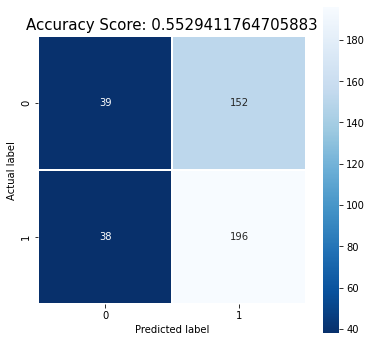

In [329]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Stepwise Regression (feature 2)

In [330]:
#we make a new list without the feature we are already using, and removing the chemicals that create singular matrix issues
#(which is Perfluorononanoic acid (ug/L) detection level)
include_2=list(X_train_COMBO.drop(columns=used_step3_COMBO).columns)

In [331]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_2= {}
loglik_dict_2= {}
causes_error_2=[]
#for loop for the second to include
for i in include_2:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train_COMBO[[used_step3_COMBO[0],i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_2[i]=bic
    loglik_dict_2[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_2.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.677136
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677226
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.673743
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677377
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.677043
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677111
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677031
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677060
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677419
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.677607
  

In [332]:
causes_error_2

[]

In [333]:
#looking at all the bic scores
bic_dict_2

{'LBDPFBSL': 2306.8760547663223,
 'LBDPFDEL': 2306.960285663938,
 'LBDPFDOL': 2308.511908559884,
 'LBDPFHPL': 2306.7012133939074,
 'LBDPFHSL': 2307.7799353575515,
 'LBDPFNAL': 2307.9230125799827,
 'LBDPFUAL': 2308.38788992958,
 'LBXPFBS': 2306.645427110414,
 'LBXPFDE': 2307.2673984797557,
 'LBXPFDO': 2308.176788952033,
 'LBXPFHP': 2306.602467692292,
 'LBXPFHS': 2295.431250720197,
 'LBXPFUA': 2308.5590790380406,
 'URD14DLC': 2305.3770773645306,
 'URDBP3LC': 2308.5328623262785,
 'URDBPFLC': 2305.156281828711,
 'URDBPHLC': 2308.547036325084,
 'URDBPSLC': 2307.844273502383,
 'URDBUPLC': 2307.595976571119,
 'URDCNPLC': 2308.3335186970494,
 'URDCOPLC': 2308.3696767781576,
 'URDDCBLC': 2308.494707509528,
 'URDECPLC': 2308.4571652471273,
 'URDEPBLC': 2306.7495618784355,
 'URDMBPLC': 2307.572993392965,
 'URDMC1LC': 2307.9369404428166,
 'URDMCHLC': 2308.3265921018906,
 'URDMEPLC': 2308.500416569667,
 'URDMHHLC': 2308.1698984601157,
 'URDMHPLC': 2308.3966638070237,
 'URDMIBLC': 2306.7731728377953

In [334]:
#looking at all the log likelihoods
loglik_dict_2

{'LBDPFBSL': -1150.411982798699,
 'LBDPFDEL': -1150.4540982475069,
 'LBDPFDOL': -1151.2299096954798,
 'LBDPFHPL': -1150.3245621124915,
 'LBDPFHSL': -1150.8639230943136,
 'LBDPFNAL': -1150.9354617055292,
 'LBDPFUAL': -1151.1679003803279,
 'LBXPFBS': -1150.2966689707448,
 'LBXPFDE': -1150.6076546554157,
 'LBXPFDO': -1151.0623498915543,
 'LBXPFHP': -1150.2751892616839,
 'LBXPFHS': -1144.6895807756364,
 'LBXPFUA': -1151.2534949345581,
 'URD14DLC': -1149.6624940978031,
 'URDBP3LC': -1151.240386578677,
 'URDBPFLC': -1149.5520963298934,
 'URDBPHLC': -1151.2474735780797,
 'URDBPSLC': -1150.8960921667294,
 'URDBUPLC': -1150.7719437010974,
 'URDCNPLC': -1151.1407147640625,
 'URDCOPLC': -1151.1587938046166,
 'URDDCBLC': -1151.2213091703018,
 'URDECPLC': -1151.2025380391015,
 'URDEPBLC': -1150.3487363547556,
 'URDMBPLC': -1150.7604521120204,
 'URDMC1LC': -1150.9424256369462,
 'URDMCHLC': -1151.1372514664831,
 'URDMEPLC': -1151.2241637003713,
 'URDMHHLC': -1151.0589046455957,
 'URDMHPLC': -1151.172

In [335]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
print(list(bic_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))],min(bic_dict_2.values()),loglik_dict_2[list(loglik_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))]])

LBXPFHS 2295.431250720197 -1144.6895807756364


In [336]:
used_step3_COMBO.append(list(bic_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))])
used_step3_COMBO

['LBXPFNA', 'LBXPFHS']

In [337]:
log_reg=sm.Logit(Y_train,X_train_COMBO[used_step3_COMBO]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.673743
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1697
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                 0.01884
Time:                        00:16:01   Log-Likelihood:                -1144.7
converged:                       True   LL-Null:                       -1166.7
Covariance Type:            nonrobust   LLR p-value:                 3.346e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -0.3994      0.068     -5.855      0.000      -0.533      -0.266
LBXPFHS       -0.1983      0.

In [338]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clf=model.fit(X_train_COMBO[used_step3_COMBO],Y_train)
prediction = clf.predict_proba(X_test_COMBO[used_step3_COMBO])
score = model.score(X_test_COMBO[used_step3_COMBO],Y_test)
print(score)

0.5670588235294117


In [339]:
predictions = [round(value) for value in prediction[:,1]]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.5670588235294117


In [340]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[ 64 127]
 [ 57 177]]


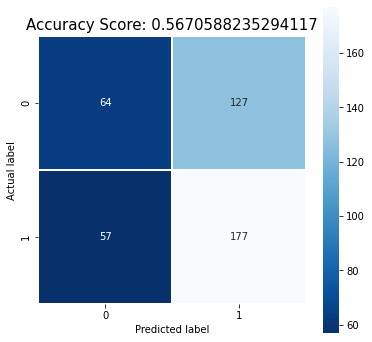

In [341]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Stepwise Regression (feature 3)




In [342]:
#we make a new list without the feature we are already using 
#(which is Perfluoroundecanoic comment a.k.a binary detect or not)
include_3=list(X_train_COMBO.drop(columns=used_step3_COMBO).columns)

In [343]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_3= {}
loglik_dict_3= {}
causes_error_3=[]
#for loop for the second to include
for i in include_3:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train_COMBO[[used_step3_COMBO[0],used_step3_COMBO[1],i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_3[i]=bic
    loglik_dict_3[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_3.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.672966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.670222
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.673728
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669712
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669993
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669729
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.670531
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.673708
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.672021
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.673382
  

In [344]:
causes_error_3

[]

In [345]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
#this got annoying to change so made a function
def bic_loglik(bicdictionary,loglikedictionary):
  return list(bicdictionary.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))],min(bicdictionary.values()),loglikedictionary[list(loglik_dict_2.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))]]

In [346]:
print(bic_loglik(bic_dict_3,loglik_dict_3))

('URDTLCLC', 2274.2835933906426, -1137.659934958714)


In [347]:
used_step3_COMBO.append(list(bic_dict_3.keys())[list(bic_dict_3.values()).index(min(bic_dict_3.values()))])
used_step3_COMBO

['LBXPFNA', 'LBXPFHS', 'URDTLCLC']

In [348]:
log_reg=sm.Logit(Y_train,X_train_COMBO[used_step3_COMBO]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.667520
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1696
Method:                           MLE   Df Model:                            2
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                 0.02790
Time:                        00:16:03   Log-Likelihood:                -1134.1
converged:                       True   LL-Null:                       -1166.7
Covariance Type:            nonrobust   LLR p-value:                 7.266e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -0.2413      0.076     -3.170      0.002      -0.390      -0.092
LBXPFHS       -0.3046      0.

In [349]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_COMBO[used_step3_COMBO],Y_train)
y_pred = model.predict_proba(X_test_COMBO[used_step3_COMBO])
prediction = [round(value) for value in y_pred[:,1]]
score = metrics.accuracy_score(Y_test, prediction)
print(score)

0.5976470588235294


In [350]:
predictions = [round(value) for value in prediction]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.5976470588235294


In [351]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[ 69 122]
 [ 49 185]]


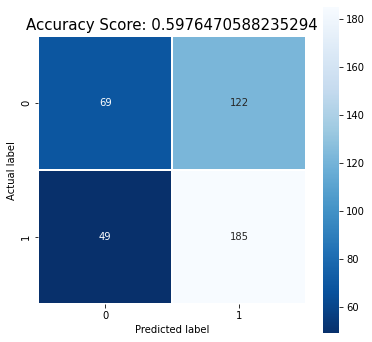

In [352]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

done, no longer improving

### ROC curves

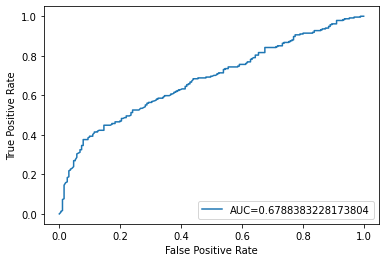

In [353]:
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##Stepwise Logistic 3 – PFAS

### stepwise regression (feature one)

In [354]:
include=list(X_train_PFAS.columns)

In [355]:
import statsmodels.api as sm
#testing out for one at a time before creating loop
log_reg=sm.Logit(Y_train,X_train_PFAS[include[0]]).fit()
#see it all
print(log_reg.summary())
#see log likelihood
print(log_reg.llf)
loglik =log_reg.llf
#BIC calculation (math.log with one arguement is natural log)
bic = (1 * math.log(len(Y_test))) - (2 * loglik)
print(bic)
#the built in bic is slightly different, we will stay with ours
log_reg.bic


Optimization terminated successfully.
         Current function value: 0.684111
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1698
Method:                           MLE   Df Model:                            0
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                0.003742
Time:                        00:16:04   Log-Likelihood:                -1162.3
converged:                       True   LL-Null:                       -1166.7
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBDPFDEL       0.6114      0.113      5.415      0.000       0.390       0.833
-1162.3051987423628
2330.6624

2332.0481926063976

In [356]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict= {}
loglik_dict= {}
causes_error=[]
#for loop for the first to include
for i in include:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train_PFAS[i]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict[i]=bic
    loglik_dict[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.684111
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682855
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684201
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690874
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.686630
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686833
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686287
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.686068
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677615
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690815
  

In [357]:
#looking at all the bic scores
bic_dict

{'LBDPFBSL': 2339.9090317083796,
 'LBDPFDEL': 2330.66248665365,
 'LBDPFDOL': 2351.332388788936,
 'LBDPFHPL': 2337.3114451285205,
 'LBDPFHSL': 2353.6431793092556,
 'LBDPFNAL': 2353.441344568015,
 'LBDPFUAL': 2340.2493497185487,
 'LBXPFBS': 2339.2210535375298,
 'LBXPFDE': 2326.393351934108,
 'LBXPFDO': 2344.5421829847496,
 'LBXPFHP': 2338.054936231579,
 'LBXPFHS': 2330.965939670877,
 'LBXPFNA': 2308.586740056909,
 'LBXPFUA': 2339.5527696134845}

In [358]:
#looking at all the log likelihoods
loglik_dict

{'LBDPFBSL': -1166.9284712697277,
 'LBDPFDEL': -1162.3051987423628,
 'LBDPFDOL': -1172.6401498100058,
 'LBDPFHPL': -1165.629677979798,
 'LBDPFHSL': -1173.7955450701656,
 'LBDPFNAL': -1173.6946276995454,
 'LBDPFUAL': -1167.0986302748122,
 'LBXPFBS': -1166.5844821843027,
 'LBXPFDE': -1160.1706313825919,
 'LBXPFDO': -1169.2450469079126,
 'LBXPFHP': -1166.0014235313274,
 'LBXPFHS': -1162.4569252509764,
 'LBXPFNA': -1151.2673254439924,
 'LBXPFUA': -1166.75034022228}

In [359]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
print(list(bic_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))],min(bic_dict.values()),loglik_dict[list(loglik_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))]])

LBXPFNA 2308.586740056909 -1151.2673254439924


In [360]:
used_step3_PFAS=[]
used_step3_PFAS.append(list(bic_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))])
used_step3_PFAS

['LBXPFNA']

In [361]:
log_reg=sm.Logit(Y_train,X_train_PFAS[used_step3_PFAS]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.677615
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1698
Method:                           MLE   Df Model:                            0
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                 0.01320
Time:                        00:16:05   Log-Likelihood:                -1151.3
converged:                       True   LL-Null:                       -1166.7
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -0.4621      0.065     -7.068      0.000      -0.590      -0.334


In [362]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clf=model.fit(X_train_PFAS[used_step3_PFAS],Y_train)
prediction = clf.predict_proba(X_test_PFAS[used_step3_PFAS])
score = model.score(X_test_PFAS[used_step3_PFAS],Y_test)
print(score)

0.5529411764705883


In [363]:
predictions = [round(value) for value in prediction[:,1]]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.5529411764705883


In [364]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[ 39 152]
 [ 38 196]]


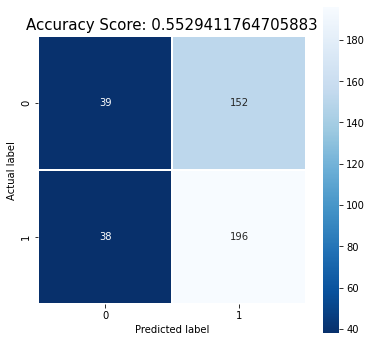

In [365]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Stepwise Regression (feature 2)

In [366]:
#we make a new list without the feature we are already using, and removing the chemicals that create singular matrix issues
#(which is Perfluorononanoic acid (ug/L) detection level)
include_2=list(X_train_PFAS.drop(columns=used_step3_PFAS).columns)

In [367]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_2= {}
loglik_dict_2= {}
causes_error_2=[]
#for loop for the second to include
for i in include_2:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train_PFAS[[used_step3_PFAS[0],i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_2[i]=bic
    loglik_dict_2[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_2.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.677136
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677226
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.673743
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677377
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.677043
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677111
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677031
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677060
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.677419
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.677607
  

In [368]:
causes_error_2

[]

In [369]:
#looking at all the bic scores
bic_dict_2

{'LBDPFBSL': 2306.8760547663223,
 'LBDPFDEL': 2306.960285663938,
 'LBDPFDOL': 2308.511908559884,
 'LBDPFHPL': 2306.7012133939074,
 'LBDPFHSL': 2307.7799353575515,
 'LBDPFNAL': 2307.9230125799827,
 'LBDPFUAL': 2308.38788992958,
 'LBXPFBS': 2306.645427110414,
 'LBXPFDE': 2307.2673984797557,
 'LBXPFDO': 2308.176788952033,
 'LBXPFHP': 2306.602467692292,
 'LBXPFHS': 2295.431250720197,
 'LBXPFUA': 2308.5590790380406}

In [370]:
#looking at all the log likelihoods
loglik_dict_2

{'LBDPFBSL': -1150.411982798699,
 'LBDPFDEL': -1150.4540982475069,
 'LBDPFDOL': -1151.2299096954798,
 'LBDPFHPL': -1150.3245621124915,
 'LBDPFHSL': -1150.8639230943136,
 'LBDPFNAL': -1150.9354617055292,
 'LBDPFUAL': -1151.1679003803279,
 'LBXPFBS': -1150.2966689707448,
 'LBXPFDE': -1150.6076546554157,
 'LBXPFDO': -1151.0623498915543,
 'LBXPFHP': -1150.2751892616839,
 'LBXPFHS': -1144.6895807756364,
 'LBXPFUA': -1151.2534949345581}

In [371]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
print(list(bic_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))],min(bic_dict_2.values()),loglik_dict_2[list(loglik_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))]])

LBXPFHS 2295.431250720197 -1144.6895807756364


In [372]:
used_step3_PFAS.append(list(bic_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))])
used_step3_PFAS

['LBXPFNA', 'LBXPFHS']

In [373]:
log_reg=sm.Logit(Y_train,X_train_PFAS[used_step3_PFAS]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.673743
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1697
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                 0.01884
Time:                        00:16:07   Log-Likelihood:                -1144.7
converged:                       True   LL-Null:                       -1166.7
Covariance Type:            nonrobust   LLR p-value:                 3.346e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -0.3994      0.068     -5.855      0.000      -0.533      -0.266
LBXPFHS       -0.1983      0.

In [374]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clf=model.fit(X_train_PFAS[used_step3_PFAS],Y_train)
prediction = clf.predict_proba(X_test_PFAS[used_step3_PFAS])
score = model.score(X_test_PFAS[used_step3_PFAS],Y_test)
print(score)

0.5670588235294117


In [375]:
predictions = [round(value) for value in prediction[:,1]]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.5670588235294117


In [376]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[ 64 127]
 [ 57 177]]


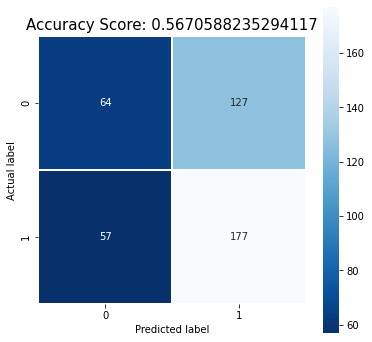

In [377]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Stepwise Regression (feature 3)




In [378]:
#we make a new list without the feature we are already using 
#(which is Perfluoroundecanoic comment a.k.a binary detect or not)
include_3=list(X_train_PFAS.drop(columns=used_step3_PFAS).columns)

In [379]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_3= {}
loglik_dict_3= {}
causes_error_3=[]
#for loop for the second to include
for i in include_3:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train_PFAS[[used_step3_PFAS[0],used_step3_PFAS[1],i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_3[i]=bic
    loglik_dict_3[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_3.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.672966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.670222
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.673728
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669712
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669993
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669729
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.670531
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.673708
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.672021
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.673382
  

In [380]:
causes_error_3

[]

In [381]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
#this got annoying to change so made a function
def bic_loglik(bicdictionary,loglikedictionary):
  return list(bicdictionary.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))],min(bicdictionary.values()),loglikedictionary[list(loglik_dict_2.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))]]

In [382]:
print(bic_loglik(bic_dict_3,loglik_dict_3))

('LBXPFBS', 2281.7335286787593, -1144.664001740156)


In [383]:
used_step3_PFAS.append(list(bic_dict_3.keys())[list(bic_dict_3.values()).index(min(bic_dict_3.values()))])
used_step3_PFAS

['LBXPFNA', 'LBXPFHS', 'LBXPFBS']

In [384]:
log_reg=sm.Logit(Y_train,X_train_PFAS[used_step3_PFAS]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.669712
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1696
Method:                           MLE   Df Model:                            2
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                 0.02471
Time:                        00:16:08   Log-Likelihood:                -1137.8
converged:                       True   LL-Null:                       -1166.7
Covariance Type:            nonrobust   LLR p-value:                 3.013e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -0.2131      0.084     -2.525      0.012      -0.379      -0.048
LBXPFHS       -0.3164      0.

In [385]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_PFAS[used_step3_PFAS],Y_train)
y_pred = model.predict_proba(X_test_PFAS[used_step3_PFAS])
prediction = [round(value) for value in y_pred[:,1]]
score = model.score(X_test_PFAS[used_step3_PFAS],Y_test)
print(score)

0.5670588235294117


In [386]:
predictions = [round(value) for value in prediction]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.5670588235294117


In [387]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[ 63 128]
 [ 56 178]]


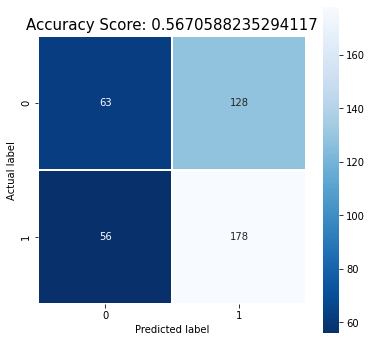

In [388]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

done, no longer improving

### Stepwise Regression (feature 4)




In [389]:
#we make a new list without the feature we are already using 
#(which is Perfluoroundecanoic comment a.k.a binary detect or not)
include_4=list(X_train_PFAS.drop(columns=used_step3_PFAS).columns)

In [390]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_4= {}
loglik_dict_4= {}
causes_error_4=[]
#for loop for the second to include
for i in include_3:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train_PFAS[[used_step3_PFAS[0],used_step3_PFAS[1],used_step3_PFAS[2],i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_4[i]=bic
    loglik_dict_4[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_4.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.669453
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669644
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669712
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669712
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669128
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669696
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669712
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669685
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.667984
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669282
  

In [391]:
causes_error_4

['LBXPFBS']

In [392]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
#this got annoying to change so made a function
def bic_loglik(bicdictionary,loglikedictionary):
  return list(bicdictionary.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))],min(bicdictionary.values()),loglikedictionary[list(loglikedictionary.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))]]

In [393]:
print(bic_loglik(bic_dict_4,loglik_dict_4))

('LBXPFDO', 2270.0345024203916, -1131.9912066257336)


In [394]:
log_reg=sm.Logit(Y_train,X_train_PFAS[used_step3_PFAS]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.669712
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1696
Method:                           MLE   Df Model:                            2
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                 0.02471
Time:                        00:16:10   Log-Likelihood:                -1137.8
converged:                       True   LL-Null:                       -1166.7
Covariance Type:            nonrobust   LLR p-value:                 3.013e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LBXPFNA       -0.2131      0.084     -2.525      0.012      -0.379      -0.048
LBXPFHS       -0.3164      0.

In [395]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_PFAS[used_step3_PFAS],Y_train)
y_pred = model.predict_proba(X_test_PFAS[used_step3_PFAS])
prediction = [round(value) for value in y_pred[:,1]]
score = model.score(X_test_PFAS[used_step3_PFAS],Y_test)
print(score)

0.5670588235294117


In [396]:
predictions = [round(value) for value in prediction]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.5670588235294117


In [397]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[ 63 128]
 [ 56 178]]


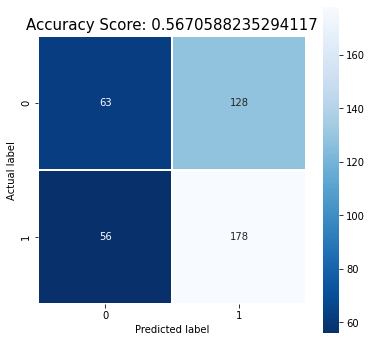

In [398]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

done, no longer improving

### ROC curves

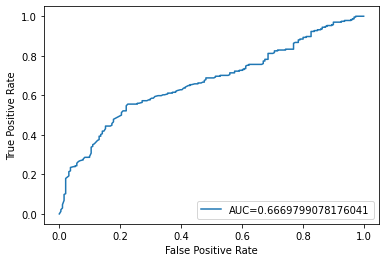

In [399]:
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##Stepwise Logistic 3 – OUT

### stepwise regression (feature one)

In [400]:
include=list(X_train_OUT.columns)

In [401]:
import statsmodels.api as sm
#testing out for one at a time before creating loop
log_reg=sm.Logit(Y_train,X_train_OUT[include[0]]).fit()
#see it all
print(log_reg.summary())
#see log likelihood
print(log_reg.llf)
loglik =log_reg.llf
#BIC calculation (math.log with one arguement is natural log)
bic = (1 * math.log(len(Y_test))) - (2 * loglik)
print(bic)
#the built in bic is slightly different, we will stay with ours
log_reg.bic


Optimization terminated successfully.
         Current function value: 0.693128
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1698
Method:                           MLE   Df Model:                            0
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:               -0.009388
Time:                        00:16:11   Log-Likelihood:                -1177.6
converged:                       True   LL-Null:                       -1166.7
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
URDBP3LC       0.0667      0.258      0.258      0.796      -0.440       0.573
-1177.623720262429
2361.29952

2362.68523564653

In [402]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict= {}
loglik_dict= {}
causes_error=[]
#for loop for the first to include
for i in include:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train_OUT[i]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict[i]=bic
    loglik_dict[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.693128
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693132
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.686385
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684842
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692202
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.689493
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.689205
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691769
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.688811
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693114
  

In [403]:
#looking at all the bic scores
bic_dict

{'URD14DLC': 2359.5304961678225,
 'URDBP3LC': 2361.2995296937825,
 'URDBPFLC': 2347.8151225166243,
 'URDBPHLC': 2361.3162035019827,
 'URDBPSLC': 2361.1544000188246,
 'URDBUPLC': 2347.969744201379,
 'URDCNPLC': 2360.973787184721,
 'URDCOPLC': 2361.0264106380278,
 'URDDCBLC': 2361.171009303366,
 'URDECPLC': 2361.1648535761115,
 'URDEPBLC': 2346.6306152270577,
 'URDMBPLC': 2361.032186097637,
 'URDMC1LC': 2358.152242055415,
 'URDMCHLC': 2350.872155583303,
 'URDMEPLC': 2361.0264106380278,
 'URDMHHLC': 2360.5375697651302,
 'URDMHPLC': 2359.26215648669,
 'URDMIBLC': 2360.7834960680834,
 'URDMNPLC': 2357.101010246893,
 'URDMOHLC': 2360.8608656331867,
 'URDMPBLC': 2361.2548678402914,
 'URDMZPLC': 2357.3738025302314,
 'URDPPBLC': 2359.5381870506058,
 'URDTLCLC': 2333.1466950205277,
 'URDTRSLC': 2358.1540290166463,
 'URXBPF': 2356.750898712875,
 'URXBUP': 2348.947695731364,
 'URXEPB': 2356.6820467758066,
 'URXMHP': 2350.5863295147124,
 'URXMNP': 2349.2108611747694,
 'URXTLC': 2338.389418084957}

In [404]:
#looking at all the log likelihoods
loglik_dict

{'URD14DLC': -1176.739203499449,
 'URDBP3LC': -1177.623720262429,
 'URDBPFLC': -1170.88151667385,
 'URDBPHLC': -1177.6320571665292,
 'URDBPSLC': -1177.5511554249501,
 'URDBUPLC': -1170.9588275162273,
 'URDCNPLC': -1177.4608490078983,
 'URDCOPLC': -1177.4871607345517,
 'URDDCBLC': -1177.559460067221,
 'URDECPLC': -1177.5563822035936,
 'URDEPBLC': -1170.2892630290667,
 'URDMBPLC': -1177.4900484643563,
 'URDMC1LC': -1176.0500764432454,
 'URDMCHLC': -1172.4100332071894,
 'URDMEPLC': -1177.4871607345517,
 'URDMHHLC': -1177.242740298103,
 'URDMHPLC': -1176.6050336588828,
 'URDMIBLC': -1177.3657034495795,
 'URDMNPLC': -1175.5244605389844,
 'URDMOHLC': -1177.4043882321312,
 'URDMPBLC': -1177.6013893356835,
 'URDMZPLC': -1175.6608566806535,
 'URDPPBLC': -1176.7430489408407,
 'URDTLCLC': -1163.5473029258017,
 'URDTRSLC': -1176.050969923861,
 'URXBPF': -1175.3494047719753,
 'URXBUP': -1171.4478032812199,
 'URXEPB': -1175.3149788034411,
 'URXMHP': -1172.267120172894,
 'URXMNP': -1171.5793860029225

In [405]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
print(list(bic_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))],min(bic_dict.values()),loglik_dict[list(loglik_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))]])

URDTLCLC 2333.1466950205277 -1163.5473029258017


In [406]:
used_step3_OUT=[]
used_step3_OUT.append(list(bic_dict.keys())[list(bic_dict.values()).index(min(bic_dict.values()))])
used_step3_OUT

['URDTLCLC']

In [407]:
log_reg=sm.Logit(Y_train,X_train_OUT[used_step3_OUT]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.684842
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1698
Method:                           MLE   Df Model:                            0
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                0.002678
Time:                        00:16:12   Log-Likelihood:                -1163.5
converged:                       True   LL-Null:                       -1166.7
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
URDTLCLC       0.3396      0.064      5.274      0.000       0.213       0.466


In [408]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clf=model.fit(X_train_OUT[used_step3_OUT],Y_train)
prediction = clf.predict_proba(X_test_OUT[used_step3_OUT])
score = model.score(X_test_OUT[used_step3_OUT],Y_test)
print(score)

0.5505882352941176


In [409]:
predictions = [round(value) for value in prediction[:,1]]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.5505882352941176


In [410]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[  0 191]
 [  0 234]]


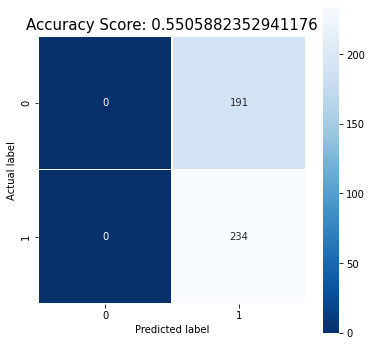

In [411]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Stepwise Regression (feature 2)

In [412]:
#we make a new list without the feature we are already using, and removing the chemicals that create singular matrix issues
#(which is Perfluorononanoic acid (ug/L) detection level)
include_2=list(X_train_OUT.drop(columns=used_step3_OUT).columns)

In [413]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_2= {}
loglik_dict_2= {}
causes_error_2=[]
#for loop for the second to include
for i in include_2:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train_OUT[[used_step3_OUT[0],i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_2[i]=bic
    loglik_dict_2[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_2.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.684759
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684552
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684732
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684803
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684803
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684820
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684755
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684584
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684841
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.684672
  

In [414]:
causes_error_2

[]

In [415]:
#looking at all the bic scores
bic_dict_2

{'URD14DLC': 2328.910850545871,
 'URDBP3LC': 2332.8628711878373,
 'URDBPFLC': 2331.807622689779,
 'URDBPHLC': 2332.1596016186177,
 'URDBPSLC': 2331.550977803013,
 'URDBUPLC': 2333.069692488363,
 'URDCNPLC': 2333.142403663654,
 'URDCOPLC': 2332.9929753262836,
 'URDDCBLC': 2332.6927555530724,
 'URDECPLC': 2332.6876681378894,
 'URDEPBLC': 2332.269299033013,
 'URDMBPLC': 2331.0589733072525,
 'URDMC1LC': 2333.1280735957776,
 'URDMCHLC': 2332.8176245804807,
 'URDMEPLC': 2332.9929753262836,
 'URDMHHLC': 2332.9362521358426,
 'URDMHPLC': 2330.131963180458,
 'URDMIBLC': 2330.1822195725717,
 'URDMNPLC': 2330.4688616362505,
 'URDMOHLC': 2332.1203004285644,
 'URDMPBLC': 2333.143112434575,
 'URDMZPLC': 2332.047612461193,
 'URDPPBLC': 2332.5678805744615,
 'URDTRSLC': 2333.0115574474125,
 'URXBPF': 2333.140544278194,
 'URXBUP': 2333.0120109813447,
 'URXEPB': 2332.8488015161097,
 'URXMHP': 2327.1407165128635,
 'URXMNP': 2323.6707711799877,
 'URXTLC': 2332.7724637669494}

In [416]:
#looking at all the log likelihoods
loglik_dict_2

{'URD14DLC': -1161.4293806884734,
 'URDBP3LC': -1163.4053910094565,
 'URDBPFLC': -1162.8777667604272,
 'URDBPHLC': -1163.0537562248467,
 'URDBPSLC': -1162.7494443170444,
 'URDBUPLC': -1163.5088016597194,
 'URDCNPLC': -1163.5451572473648,
 'URDCOPLC': -1163.4704430786796,
 'URDDCBLC': -1163.320333192074,
 'URDECPLC': -1163.3177894844825,
 'URDEPBLC': -1163.1086049320443,
 'URDMBPLC': -1162.503442069164,
 'URDMC1LC': -1163.5379922134266,
 'URDMCHLC': -1163.3827677057782,
 'URDMEPLC': -1163.4704430786796,
 'URDMHHLC': -1163.442081483459,
 'URDMHPLC': -1162.039937005767,
 'URDMIBLC': -1162.0650652018237,
 'URDMNPLC': -1162.208386233663,
 'URDMOHLC': -1163.03410562982,
 'URDMPBLC': -1163.5455116328253,
 'URDMZPLC': -1162.9977616461342,
 'URDPPBLC': -1163.2578957027686,
 'URDTRSLC': -1163.479734139244,
 'URXBPF': -1163.5442275546347,
 'URXBUP': -1163.4799609062102,
 'URXEPB': -1163.3983561735927,
 'URXMHP': -1160.5443136719696,
 'URXMNP': -1158.8093410055317,
 'URXTLC': -1163.3601872990125}

In [417]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
print(list(bic_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))],min(bic_dict_2.values()),loglik_dict_2[list(loglik_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))]])

URXMNP 2323.6707711799877 -1158.8093410055317


In [418]:
used_step3_OUT.append(list(bic_dict_2.keys())[list(bic_dict_2.values()).index(min(bic_dict_2.values()))])
used_step3_OUT

['URDTLCLC', 'URXMNP']

In [419]:
log_reg=sm.Logit(Y_train,X_train_OUT[used_step3_OUT]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.682054
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1697
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                0.006739
Time:                        00:16:14   Log-Likelihood:                -1158.8
converged:                       True   LL-Null:                       -1166.7
Covariance Type:            nonrobust   LLR p-value:                 7.329e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
URDTLCLC       0.3247      0.065      5.021      0.000       0.198       0.451
URXMNP         0.1472      0.

In [420]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clf=model.fit(X_train_OUT[used_step3_OUT],Y_train)
prediction = clf.predict_proba(X_test_OUT[used_step3_OUT])
score = model.score(X_test_OUT[used_step3_OUT],Y_test)
print(score)

0.5741176470588235


In [421]:
predictions = [round(value) for value in prediction[:,1]]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.5741176470588235


In [422]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[ 55 136]
 [ 45 189]]


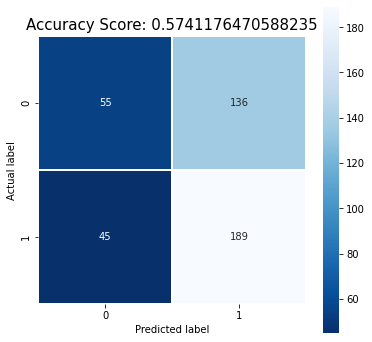

In [423]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Stepwise Regression (feature 3)




In [424]:
#we make a new list without the feature we are already using 
#(which is Perfluoroundecanoic comment a.k.a binary detect or not)
include_3=list(X_train_OUT.drop(columns=used_step3_OUT).columns)

In [425]:
#importing what we need
import statsmodels.api as sm
import math
#setting up empty dictionaries and list
bic_dict_3= {}
loglik_dict_3= {}
causes_error_3=[]
#for loop for the second to include
for i in include_3:
  #we are doing try and except after already looking through the errors caused by these chemicals which can be seen below
  try:
    #using the
    log_reg=sm.Logit(Y_train,X_train_OUT[[used_step3_OUT[0],used_step3_OUT[1],i]]).fit()
    loglik =log_reg.llf
    #BIC calculation (math.log with one arguement is natural log)
    bic = (1 * math.log(len(Y_test))) - (2 * loglik)
    bic_dict_3[i]=bic
    loglik_dict_3[i]=loglik
  #if it causes an error we direct here  
  except:
    #the chemical is added to a list for this and then we move on to the next iteration
    causes_error_3.append(i)
    pass


Optimization terminated successfully.
         Current function value: 0.681992
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681845
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682019
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682032
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682052
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682053
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682049
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681845
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.682054
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681841
  

In [426]:
causes_error_3

[]

In [427]:
#prints out the chemical with the lowest bic score, the BIC, and the log likelihood
#this got annoying to change so made a function
def bic_loglik(bicdictionary,loglikedictionary):
  return list(bicdictionary.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))],min(bicdictionary.values()),loglikedictionary[list(loglikedictionary.keys())[list(bicdictionary.values()).index(min(bicdictionary.values()))]]

In [428]:
print(bic_loglik(bic_dict_3,loglik_dict_3))

('URD14DLC', 2319.8238155595664, -1156.885863195321)


In [429]:
used_step3_OUT.append(list(bic_dict_3.keys())[list(bic_dict_3.values()).index(min(bic_dict_3.values()))])
used_step3_OUT

['URDTLCLC', 'URXMNP', 'URD14DLC']

In [430]:
log_reg=sm.Logit(Y_train,X_train_OUT[used_step3_OUT]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.680922
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               LBDMPAHL   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1696
Method:                           MLE   Df Model:                            2
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                0.008388
Time:                        00:16:16   Log-Likelihood:                -1156.9
converged:                       True   LL-Null:                       -1166.7
Covariance Type:            nonrobust   LLR p-value:                 5.626e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
URDTLCLC       0.3416      0.065      5.230      0.000       0.214       0.470
URXMNP         0.1443      0.

In [431]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_OUT[used_step3_OUT],Y_train)
y_pred = model.predict_proba(X_test_OUT[used_step3_OUT])
prediction = [round(value) for value in y_pred[:,1]]
score = model.score(X_test_OUT[used_step3_OUT],Y_test)
print(score)

0.5694117647058824


In [432]:
predictions = [round(value) for value in prediction]
accuracy = metrics.accuracy_score(Y_test, predictions)
print(accuracy)

0.5694117647058824


In [433]:
# confusion matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[ 57 134]
 [ 49 185]]


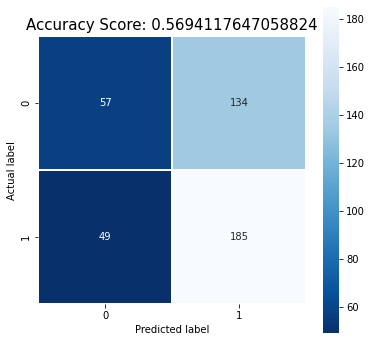

In [434]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

done, no longer improving

### ROC curves

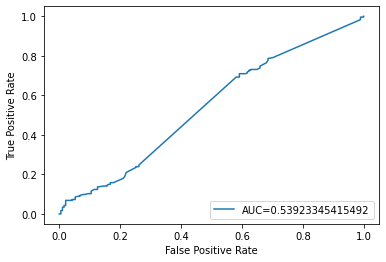

In [435]:
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred[:,1])
auc = metrics.roc_auc_score(Y_test, y_pred[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Naiman's stepwise Logistic

##Naiman's stepwise–COMBO

In [436]:
DFTrain, DFTest = X_train_COMBO.copy(), X_test_COMBO.copy()
DFTrain['Y']=Y_train
DFTest['Y']=Y_test

In [437]:
used=[]
unused=[c for c in DFTrain.columns if c!="Y"]

ctr=0
maxloglike=-9999999999
for c in unused:
    #print(c)
    LR = LogisticRegression()
    DFT=DFTrain.loc[:,used+[c]]
    LR.fit(DFT,DFTrain["Y"])
    plog=LR.predict_log_proba(DFT)
    plog0=plog[:,0]
    plog1=plog[:,1]
    loglike=np.sum(DFTrain["Y"]*plog1+(1-DFTrain["Y"])*plog0)
    if loglike>maxloglike:
        maxloglike=loglike
        bestc=c

    
print("variable added = "+str(bestc)+" maximum likelihood = " + str(maxloglike))
used.append(bestc)
unused=[c for c in unused if c!=bestc]
for ctr in range(25):
    maxloglike=-99999999
    for c in unused:
        LR = LogisticRegression()
        DFT=DFTrain.loc[:,used+[c]]
        try:
            LR.fit(DFT,DFTrain["Y"])
            plog=LR.predict_log_proba(DFT)
            plog0=plog[:,0]
            plog1=plog[:,1]
            loglike=np.sum(DFTrain["Y"]*plog1+(1-DFTrain["Y"])*plog0)
            if loglike>maxloglike:
                maxloglike=loglike
                bestc=c
        except:
            pass
    print("variable added = "+str(bestc)+" maximum likelihood = " + str(maxloglike))
    used.append(bestc)
    unused=[c for c in unused if c!=bestc]


variable added = LBXPFHS maximum likelihood = -1141.1091200926437
variable added = LBXPFDO maximum likelihood = -1136.4226123974743
variable added = LBXPFNA maximum likelihood = -1131.8991976820712
variable added = URXMNP maximum likelihood = -1128.5203497277475
variable added = URDTLCLC maximum likelihood = -1124.5749622101252
variable added = URD14DLC maximum likelihood = -1122.6467876776876
variable added = LBXPFUA maximum likelihood = -1121.409398698761
variable added = LBXPFDE maximum likelihood = -1118.5005416714546
variable added = URDMBPLC maximum likelihood = -1117.199203203996
variable added = URDMZPLC maximum likelihood = -1115.0975071550083
variable added = URDMIBLC maximum likelihood = -1113.9303271203223
variable added = URDBPFLC maximum likelihood = -1113.0115481507682
variable added = URDBPSLC maximum likelihood = -1112.3793423914374
variable added = URDPPBLC maximum likelihood = -1111.8513286326047
variable added = URXBPF maximum likelihood = -1111.3731456778783


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


variable added = URDMC1LC maximum likelihood = -1111.0117154075867


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


variable added = URDMCHLC maximum likelihood = -1110.6489307196741


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


variable added = LBDPFBSL maximum likelihood = -1110.342470255057


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


variable added = LBXPFBS maximum likelihood = -1109.6489846177415


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


variable added = URDEPBLC maximum likelihood = -1109.3365999392609


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


variable added = URDMOHLC maximum likelihood = -1109.0771082055528


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


variable added = URDMHHLC maximum likelihood = -1108.8246349368333


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


variable added = LBDPFDOL maximum likelihood = -1108.611820890876


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


variable added = URDTRSLC maximum likelihood = -1108.40382187875


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


variable added = URDMPBLC maximum likelihood = -1108.1977425888936


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


variable added = URDBPHLC maximum likelihood = -1108.005107349004


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [438]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(DFTrain[used],DFTrain["Y"])
y_pred = model.predict_proba(DFTest[used])
prediction = [round(value) for value in y_pred[:,1]]
score = metrics.accuracy_score(DFTest["Y"], prediction)
print(score)

0.6188235294117647


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [439]:
#for later use
y_pred_steplog_COMBO = model.predict_proba(DFTest[used])
prediction_steplog_COMBO = [round(value) for value in y_pred_steplog_COMBO[:,1]]
score_steplog_COMBO = metrics.accuracy_score(DFTest["Y"], prediction_steplog_COMBO)

##Naiman's stepwise–PFAS

In [440]:
DFTrain, DFTest = X_train_PFAS.copy(), X_test_PFAS.copy()
DFTrain['Y']=Y_train
DFTest['Y']=Y_test

In [441]:
used=[]
unused=[c for c in DFTrain.columns if c!="Y"]

ctr=0
maxloglike=-9999999999
for c in unused:
    #print(c)
    LR = LogisticRegression()
    DFT=DFTrain.loc[:,used+[c]]
    LR.fit(DFT,DFTrain["Y"])
    plog=LR.predict_log_proba(DFT)
    plog0=plog[:,0]
    plog1=plog[:,1]
    loglike=np.sum(DFTrain["Y"]*plog1+(1-DFTrain["Y"])*plog0)
    if loglike>maxloglike:
        maxloglike=loglike
        bestc=c

    
print("variable added = "+str(bestc)+" maximum likelihood = " + str(maxloglike))
used.append(bestc)
unused=[c for c in unused if c!=bestc]
for ctr in range(25):
    maxloglike=-99999999
    for c in unused:
        LR = LogisticRegression()
        DFT=DFTrain.loc[:,used+[c]]
        try:
            LR.fit(DFT,DFTrain["Y"])
            plog=LR.predict_log_proba(DFT)
            plog0=plog[:,0]
            plog1=plog[:,1]
            loglike=np.sum(DFTrain["Y"]*plog1+(1-DFTrain["Y"])*plog0)
            if loglike>maxloglike:
                maxloglike=loglike
                bestc=c
        except:
            pass
    print("variable added = "+str(bestc)+" maximum likelihood = " + str(maxloglike))
    used.append(bestc)
    unused=[c for c in unused if c!=bestc]


variable added = LBXPFHS maximum likelihood = -1141.1091200926437
variable added = LBXPFDO maximum likelihood = -1136.4226123974743
variable added = LBXPFNA maximum likelihood = -1131.8991976820712
variable added = LBXPFUA maximum likelihood = -1130.6264950982381
variable added = LBXPFDE maximum likelihood = -1127.4917054743796
variable added = LBDPFBSL maximum likelihood = -1126.9740050641847
variable added = LBXPFBS maximum likelihood = -1126.0886738779898
variable added = LBDPFDOL maximum likelihood = -1125.8780354662847
variable added = LBDPFDEL maximum likelihood = -1125.8931385288467


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


variable added = LBXPFHP maximum likelihood = -1125.8360780560388


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


variable added = LBDPFHPL maximum likelihood = -1125.8131056418988
variable added = LBDPFNAL maximum likelihood = -1125.7859490725455


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


variable added = LBDPFHSL maximum likelihood = -1125.7629159312592
variable added = LBDPFUAL maximum likelihood = -1125.7625038955778
variable added = LBDPFUAL maximum likelihood = -99999999
variable added = LBDPFUAL maximum likelihood = -99999999
variable added = LBDPFUAL maximum likelihood = -99999999
variable added = LBDPFUAL maximum likelihood = -99999999
variable added = LBDPFUAL maximum likelihood = -99999999
variable added = LBDPFUAL maximum likelihood = -99999999
variable added = LBDPFUAL maximum likelihood = -99999999
variable added = LBDPFUAL maximum likelihood = -99999999
variable added = LBDPFUAL maximum likelihood = -99999999
variable added = LBDPFUAL maximum likelihood = -99999999
variable added = LBDPFUAL maximum likelihood = -99999999
variable added = LBDPFUAL maximum likelihood = -99999999


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [442]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(DFTrain[used],DFTrain["Y"])
y_pred = model.predict_proba(DFTest[used])
prediction = [round(value) for value in y_pred[:,1]]
score = metrics.accuracy_score(DFTest["Y"], prediction)
print(score)

0.6070588235294118


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [443]:
#for later use
y_pred_steplog_PFAS = model.predict_proba(DFTest[used])
prediction_steplog_PFAS = [round(value) for value in y_pred_steplog_PFAS[:,1]]
score_steplog_PFAS = metrics.accuracy_score(DFTest["Y"], prediction_steplog_PFAS)

##Naiman's stepwise–OUT

In [444]:
DFTrain, DFTest = X_train_OUT.copy(), X_test_OUT.copy()
DFTrain['Y']=Y_train
DFTest['Y']=Y_test

In [445]:
used=[]
unused=[c for c in DFTrain.columns if c!="Y"]

ctr=0
maxloglike=-9999999999
for c in unused:
    #print(c)
    LR = LogisticRegression()
    DFT=DFTrain.loc[:,used+[c]]
    LR.fit(DFT,DFTrain["Y"])
    plog=LR.predict_log_proba(DFT)
    plog0=plog[:,0]
    plog1=plog[:,1]
    loglike=np.sum(DFTrain["Y"]*plog1+(1-DFTrain["Y"])*plog0)
    if loglike>maxloglike:
        maxloglike=loglike
        bestc=c

    
print("variable added = "+str(bestc)+" maximum likelihood = " + str(maxloglike))
used.append(bestc)
unused=[c for c in unused if c!=bestc]
for ctr in range(25):
    maxloglike=-99999999
    for c in unused:
        LR = LogisticRegression()
        DFT=DFTrain.loc[:,used+[c]]
        try:
            LR.fit(DFT,DFTrain["Y"])
            plog=LR.predict_log_proba(DFT)
            plog0=plog[:,0]
            plog1=plog[:,1]
            loglike=np.sum(DFTrain["Y"]*plog1+(1-DFTrain["Y"])*plog0)
            if loglike>maxloglike:
                maxloglike=loglike
                bestc=c
        except:
            pass
    print("variable added = "+str(bestc)+" maximum likelihood = " + str(maxloglike))
    used.append(bestc)
    unused=[c for c in unused if c!=bestc]


variable added = URXMNP maximum likelihood = -1163.0493316117183
variable added = URDTLCLC maximum likelihood = -1158.7248340812316
variable added = URD14DLC maximum likelihood = -1156.7937279592352
variable added = URDMIBLC maximum likelihood = -1155.843176581093
variable added = URDMZPLC maximum likelihood = -1154.0642008529833
variable added = URDMBPLC maximum likelihood = -1153.102099910121
variable added = URDBPFLC maximum likelihood = -1152.2224929788024
variable added = URDMCHLC maximum likelihood = -1151.269287859166
variable added = URDPPBLC maximum likelihood = -1150.6814407490451
variable added = URDBPSLC maximum likelihood = -1150.1229868379537
variable added = URDMC1LC maximum likelihood = -1149.5792185406438
variable added = URDMHPLC maximum likelihood = -1149.076546262926
variable added = URDECPLC maximum likelihood = -1148.7059864688981
variable added = URDMHHLC maximum likelihood = -1148.3261385326089
variable added = URDMOHLC maximum likelihood = -1147.945433454476
va

In [446]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(DFTrain[used],DFTrain["Y"])
y_pred = model.predict_proba(DFTest[used])
prediction = [round(value) for value in y_pred[:,1]]
score = metrics.accuracy_score(DFTest["Y"], prediction)
print(score)

0.571764705882353


In [447]:
#for later use
y_pred_steplog_OUT = model.predict_proba(DFTest[used])
prediction_steplog_OUT = [round(value) for value in y_pred_steplog_OUT[:,1]]
score_steplog_OUT = metrics.accuracy_score(DFTest["Y"], prediction_steplog_OUT)

#Lasso

##Lasso Regression – COMBO

[Lasso Regression with Python](https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/)

In [448]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train_COMBO_scaled, Y_train)

Lasso(alpha=1)

In [449]:
print('R squared training set', round(reg.score(X_train_COMBO_scaled, Y_train)*100, 2))
print('R squared test set', round(reg.score(X_test_COMBO_scaled, Y_test)*100, 2))

R squared training set 0.0
R squared test set -0.02


In [450]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_COMBO_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test_COMBO_scaled)
mse_test =mean_squared_error(Y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 0.25
MSE test set 0.25


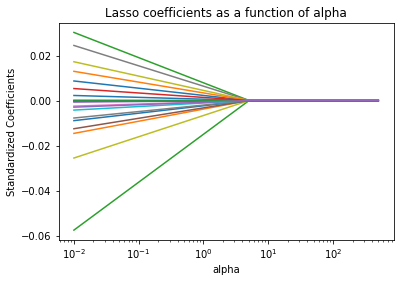

In [451]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_COMBO_scaled, Y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [452]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model_lasso_COMBO = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_lasso_COMBO.fit(X_train_COMBO_scaled, Y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [453]:
model_lasso_COMBO.alpha_


0.014900208972447607

In [454]:
# Set best alpha
lasso_best = Lasso(alpha=model_lasso_COMBO.alpha_)
lasso_best.fit(X_train_COMBO_scaled, Y_train)

Lasso(alpha=0.014900208972447607)

In [455]:
Lasso(alpha=model_lasso_COMBO.alpha_)

Lasso(alpha=0.014900208972447607)

In [456]:
print(list(zip(lasso_best.coef_, X_train_COMBO_scaled)))

[(0.0027183129580745083, array([-0.50385964,  0.57864047,  0.16020801, -0.10053365, -0.07569348,
        0.08780978, -0.29906353,  0.37554527,  0.92677855, -0.09115155,
        0.69467535, -1.11951581,  2.14279837, -2.22273693, -0.19133136,
       -0.22229084, -0.57568532,  0.84319442, -0.55854195, -0.51881336,
        0.69093509, -0.34805741, -1.02322429, -0.07297564, -0.10914143,
       -0.12707606, -0.22519146, -0.11714585, -0.04205791, -0.05432857,
       -0.12707606, -0.36007535, -0.04205791, -0.08072538,  0.56851449,
        0.16717898, -0.78815177, -0.16114026, -0.62233024,  0.81389595,
       -0.06878174, -0.16114026,  0.49407221, -0.73888488, -0.33344232])), (-0.0031898254843448623, array([-0.50385964,  0.57864047,  0.76189097, -0.10053365, -0.07569348,
        0.08780978, -0.29906353,  0.37554527,  0.22202524, -0.09115155,
        1.22648517, -1.11951581,  2.14279837, -2.22273693, -0.19133136,
       -0.22229084, -0.57568532,  0.84319442,  1.79037581, -0.51881336,
        0.6

In [457]:
print('R squared training set', round(lasso_best.score(X_train_COMBO_scaled, Y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test_COMBO_scaled, Y_test)*100, 2))

R squared training set 4.66
R squared test set 7.38


In [458]:
mean_squared_error(Y_test, lasso_best.predict(X_test_COMBO_scaled))

0.22917168668151508

run ROC curve instead!!!

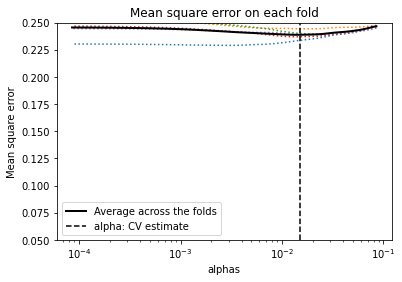

In [459]:
plt.semilogx(model_lasso_COMBO.alphas_, model_lasso_COMBO.mse_path_, ":")
plt.plot(
    model_lasso_COMBO.alphas_ ,
    model_lasso_COMBO.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model_lasso_COMBO.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0.05, 0.25
plt.ylim(ymin, ymax);

In [460]:
reg = Lasso(alpha=model_lasso_COMBO.alpha_)
reg.fit(X_train_COMBO_scaled, Y_train)
y_pred=reg.predict(X_test_COMBO_scaled)

not being able to use proba might be enough reason to not include this method, instead using the predictions with the documented threasholds to do it.

In [461]:
y_pred

array([0.50244795, 0.55205416, 0.7278949 , 0.52340733, 0.57718542,
       0.60646856, 0.40529265, 0.65348783, 0.64917515, 0.46229329,
       0.56068646, 0.7018354 , 0.6027846 , 0.49662346, 0.58794604,
       0.51396645, 0.50606581, 0.39425793, 0.60902235, 0.58457714,
       0.51645692, 0.71354664, 0.58901345, 0.46235131, 0.6377184 ,
       0.54771366, 0.55765169, 0.52164684, 0.5419531 , 0.70601116,
       0.65307243, 0.64846936, 0.62796086, 0.50441689, 0.59518379,
       0.39000165, 0.48513619, 0.51193976, 0.55130406, 0.58662669,
       0.48928774, 0.63179819, 0.43298981, 0.54699209, 0.59424822,
       0.58432923, 0.69339941, 0.68281428, 0.64506491, 0.48712656,
       0.52855823, 0.4195751 , 0.46390769, 0.46884916, 0.45197417,
       0.64150703, 0.5970779 , 0.71500021, 0.55136459, 0.52091952,
       0.57290264, 0.40760046, 0.60357126, 0.46531183, 0.62868497,
       0.42581179, 0.63737232, 0.51267408, 0.48842797, 0.64328607,
       0.46884439, 0.51463324, 0.60588856, 0.49908205, 0.46308

In [462]:
prediction=y_pred.copy()
for i in range(len(prediction)):
  if prediction[i] >= 0.10:
    prediction[i]=0
  elif prediction[i] < 0.10:
    prediction[i]=1

In [463]:
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [464]:
count= 0
for i, j in zip(prediction,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(Y_test))
print(percent_correct,'% correct')

0.44941176470588234 % correct


In [465]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[191   0]
 [234   0]]


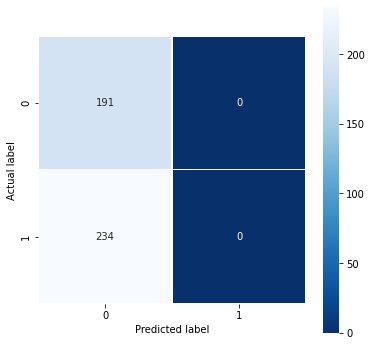

In [466]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#plt.title(all_sample_title, size = 15);

In [467]:
y_pred

array([0.50244795, 0.55205416, 0.7278949 , 0.52340733, 0.57718542,
       0.60646856, 0.40529265, 0.65348783, 0.64917515, 0.46229329,
       0.56068646, 0.7018354 , 0.6027846 , 0.49662346, 0.58794604,
       0.51396645, 0.50606581, 0.39425793, 0.60902235, 0.58457714,
       0.51645692, 0.71354664, 0.58901345, 0.46235131, 0.6377184 ,
       0.54771366, 0.55765169, 0.52164684, 0.5419531 , 0.70601116,
       0.65307243, 0.64846936, 0.62796086, 0.50441689, 0.59518379,
       0.39000165, 0.48513619, 0.51193976, 0.55130406, 0.58662669,
       0.48928774, 0.63179819, 0.43298981, 0.54699209, 0.59424822,
       0.58432923, 0.69339941, 0.68281428, 0.64506491, 0.48712656,
       0.52855823, 0.4195751 , 0.46390769, 0.46884916, 0.45197417,
       0.64150703, 0.5970779 , 0.71500021, 0.55136459, 0.52091952,
       0.57290264, 0.40760046, 0.60357126, 0.46531183, 0.62868497,
       0.42581179, 0.63737232, 0.51267408, 0.48842797, 0.64328607,
       0.46884439, 0.51463324, 0.60588856, 0.49908205, 0.46308

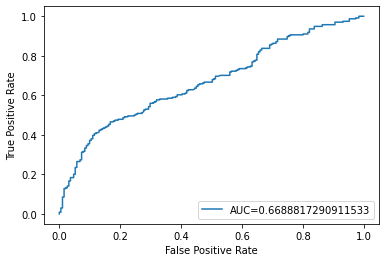

array([0.50244795, 0.55205416, 0.7278949 , 0.52340733, 0.57718542,
       0.60646856, 0.40529265, 0.65348783, 0.64917515, 0.46229329,
       0.56068646, 0.7018354 , 0.6027846 , 0.49662346, 0.58794604,
       0.51396645, 0.50606581, 0.39425793, 0.60902235, 0.58457714,
       0.51645692, 0.71354664, 0.58901345, 0.46235131, 0.6377184 ,
       0.54771366, 0.55765169, 0.52164684, 0.5419531 , 0.70601116,
       0.65307243, 0.64846936, 0.62796086, 0.50441689, 0.59518379,
       0.39000165, 0.48513619, 0.51193976, 0.55130406, 0.58662669,
       0.48928774, 0.63179819, 0.43298981, 0.54699209, 0.59424822,
       0.58432923, 0.69339941, 0.68281428, 0.64506491, 0.48712656,
       0.52855823, 0.4195751 , 0.46390769, 0.46884916, 0.45197417,
       0.64150703, 0.5970779 , 0.71500021, 0.55136459, 0.52091952,
       0.57290264, 0.40760046, 0.60357126, 0.46531183, 0.62868497,
       0.42581179, 0.63737232, 0.51267408, 0.48842797, 0.64328607,
       0.46884439, 0.51463324, 0.60588856, 0.49908205, 0.46308

In [468]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred)
auc = metrics.roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
y_pred

##Lasso Regression – PFAS

[Lasso Regression with Python](https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/)

In [469]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train_PFAS_scaled, Y_train)

Lasso(alpha=1)

In [470]:
print('R squared training set', round(reg.score(X_train_PFAS_scaled, Y_train)*100, 2))
print('R squared test set', round(reg.score(X_test_PFAS_scaled, Y_test)*100, 2))

R squared training set 0.0
R squared test set -0.02


In [471]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_PFAS_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test_PFAS_scaled)
mse_test =mean_squared_error(Y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 0.25
MSE test set 0.25


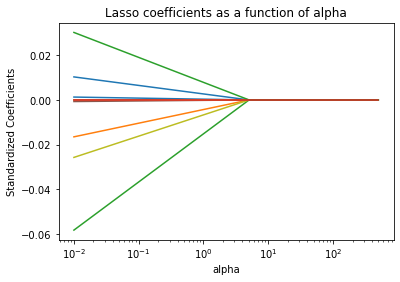

In [472]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_PFAS_scaled, Y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [473]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model_lasso_PFAS = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_lasso_PFAS.fit(X_train_PFAS_scaled, Y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [474]:
model_lasso_PFAS.alpha_


0.004243632960071975

In [475]:
# Set best alpha
lasso_best = Lasso(alpha=model_lasso_PFAS.alpha_)
lasso_best.fit(X_train_PFAS_scaled, Y_train)

Lasso(alpha=0.004243632960071975)

In [476]:
Lasso(alpha=model_lasso_PFAS.alpha_)

Lasso(alpha=0.004243632960071975)

In [477]:
print(list(zip(lasso_best.coef_, X_train_PFAS_scaled)))

[(0.0, array([-0.50385964,  0.57864047,  0.16020801, -0.10053365, -0.07569348,
        0.08780978, -0.29906353,  0.37554527,  0.92677855, -0.09115155,
        0.69467535, -1.11951581,  2.14279837, -2.22273693])), (-0.03915677011525875, array([-0.50385964,  0.57864047,  0.76189097, -0.10053365, -0.07569348,
        0.08780978, -0.29906353,  0.37554527,  0.22202524, -0.09115155,
        1.22648517, -1.11951581,  2.14279837, -2.22273693])), (-0.060589463652918445, array([-0.50385964,  2.07616235,  0.6743341 , -0.10053365, -0.07569348,
        0.08780978, -0.29906353,  0.37554527,  1.81674858, -0.09115155,
        1.89648629, -1.11951581, -0.39532635,  0.4498958 ])), (-0.0, array([ 1.98467969, -1.23147058, -1.04153853, -0.10053365, -0.07569348,
        0.08780978, -0.29906353,  0.37554527, -1.79029157, -0.09115155,
       -0.68227595,  0.8932433 , -0.39532635,  0.4498958 ])), (-0.019468166642865874, array([-0.50385964,  0.93646433,  1.23311442, -0.10053365, -0.07569348,
        0.08780978,

In [478]:
print('R squared training set', round(lasso_best.score(X_train_PFAS_scaled, Y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test_PFAS_scaled, Y_test)*100, 2))

R squared training set 4.61
R squared test set 7.43


In [479]:
mean_squared_error(Y_test, lasso_best.predict(X_test_PFAS_scaled))

0.22906596468897492

run ROC curve instead!!!

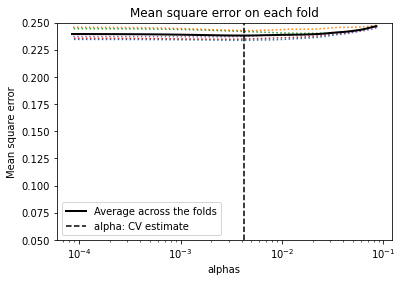

In [480]:
plt.semilogx(model_lasso_PFAS.alphas_, model_lasso_PFAS.mse_path_, ":")
plt.plot(
    model_lasso_PFAS.alphas_ ,
    model_lasso_PFAS.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model_lasso_PFAS.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0.05, 0.25
plt.ylim(ymin, ymax);

not being able to use proba might be enough reason to not include this method, instead using the predictions with the documented threasholds to do it.

In [481]:
reg = Lasso(alpha=model_lasso_PFAS.alpha_)
reg.fit(X_train_PFAS_scaled, Y_train)
y_pred=reg.predict(X_test_PFAS_scaled)

In [482]:
y_pred

array([0.50828351, 0.56277708, 0.7469622 , 0.52957063, 0.57784418,
       0.64256917, 0.40363391, 0.6293869 , 0.64361384, 0.4384237 ,
       0.56869265, 0.69807444, 0.56777687, 0.48152177, 0.55912756,
       0.550971  , 0.46767936, 0.51286015, 0.62491105, 0.52135058,
       0.46872832, 0.77258299, 0.64150583, 0.39531158, 0.62413512,
       0.5287129 , 0.54157507, 0.55841788, 0.59026081, 0.68738777,
       0.61391768, 0.66591435, 0.70030271, 0.49768851, 0.60789055,
       0.38419354, 0.39525065, 0.47064038, 0.55847594, 0.50441904,
       0.52409782, 0.65513051, 0.47115806, 0.60383542, 0.59550777,
       0.55394247, 0.71714126, 0.72664373, 0.60768883, 0.53055901,
       0.50680587, 0.4299131 , 0.49220794, 0.50218897, 0.40608892,
       0.59753876, 0.59110928, 0.69807444, 0.54940808, 0.56870358,
       0.5591283 , 0.39701132, 0.61378221, 0.47543805, 0.71485081,
       0.39122132, 0.65383055, 0.51684802, 0.4860742 , 0.71034658,
       0.431786  , 0.48625535, 0.68353436, 0.47162076, 0.46197

In [483]:
prediction=y_pred.copy()
for i in range(len(prediction)):
  if prediction[i] >= 0.10:
    prediction[i]=0
  elif prediction[i] < 0.10:
    prediction[i]=1

In [484]:
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [485]:
count= 0
for i, j in zip(prediction,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(Y_test))
print(percent_correct,'% correct')

0.44941176470588234 % correct


In [486]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[191   0]
 [234   0]]


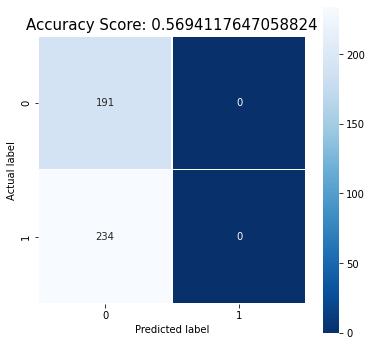

In [487]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

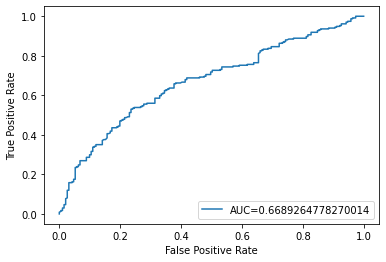

In [488]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  y_pred)
auc = metrics.roc_auc_score(Y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##Lasso Regression – OUT

[Lasso Regression with Python](https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/)

In [489]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train_OUT_scaled, Y_train)

Lasso(alpha=1)

In [490]:
print('R squared training set', round(reg.score(X_train_OUT_scaled, Y_train)*100, 2))
print('R squared test set', round(reg.score(X_test_OUT_scaled, Y_test)*100, 2))

R squared training set 0.0
R squared test set -0.02


In [491]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train_OUT_scaled)
mse_train = mean_squared_error(Y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test_OUT_scaled)
mse_test =mean_squared_error(Y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 0.25
MSE test set 0.25


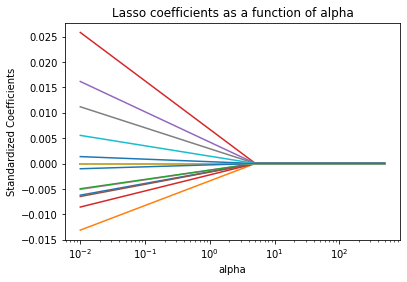

In [492]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_OUT_scaled, Y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [493]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model_lasso_OUT = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_lasso_OUT.fit(X_train_OUT_scaled, Y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [494]:
model_lasso_OUT.alpha_


0.022833299610311563

In [495]:
# Set best alpha
lasso_best = Lasso(alpha=model_lasso_OUT.alpha_)
lasso_best.fit(X_train_OUT_scaled, Y_train)

Lasso(alpha=0.022833299610311563)

In [496]:
Lasso(alpha=model_lasso_OUT.alpha_)

Lasso(alpha=0.022833299610311563)

In [497]:
print(list(zip(lasso_best.coef_, X_train_OUT_scaled)))

[(-0.0, array([-0.19133136, -0.22229084, -0.57568532,  0.84319442, -0.55854195,
       -0.51881336,  0.69093509, -0.34805741, -1.02322429, -0.07297564,
       -0.10914143, -0.12707606, -0.22519146, -0.11714585, -0.04205791,
       -0.05432857, -0.12707606, -0.36007535, -0.04205791, -0.08072538,
        0.56851449,  0.16717898, -0.78815177, -0.16114026, -0.62233024,
        0.81389595, -0.06878174, -0.16114026,  0.49407221, -0.73888488,
       -0.33344232])), (-0.0, array([-0.19133136, -0.22229084, -0.57568532,  0.84319442,  1.79037581,
       -0.51881336,  0.69093509, -0.71136186,  0.97730283, -0.07297564,
       -0.10914143, -0.12707606, -0.22519146, -0.11714585, -0.04205791,
       -0.05432857, -0.12707606, -0.36007535, -0.04205791, -0.08072538,
        0.56851449,  0.51822625, -0.78815177, -0.16114026,  0.06885356,
       -1.22865829, -0.06878174, -0.16114026,  0.00711352, -0.73888488,
       -0.33344232])), (-0.0, array([-0.19133136, -0.22229084, -0.57568532,  0.84319442,  1.790375

In [498]:
print('R squared training set', round(lasso_best.score(X_train_OUT_scaled, Y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test_OUT_scaled, Y_test)*100, 2))

R squared training set 0.48
R squared test set 0.43


In [499]:
mean_squared_error(Y_test, lasso_best.predict(X_test_OUT_scaled))

0.2463690897396963

run ROC curve instead!!!

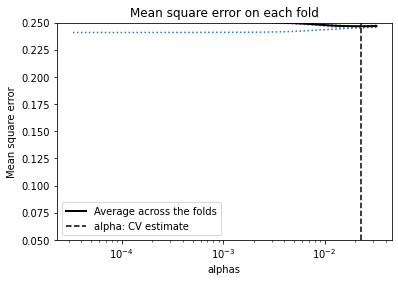

In [500]:
plt.semilogx(model_lasso_OUT.alphas_, model_lasso_OUT.mse_path_, ":")
plt.plot(
    model_lasso_OUT.alphas_ ,
    model_lasso_OUT.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model_lasso_OUT.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0.05, 0.25
plt.ylim(ymin, ymax);

In [501]:
reg = Lasso(alpha=model_lasso_OUT.alpha_)
reg.fit(X_train_OUT_scaled, Y_train)
y_pred=reg.predict(X_test_OUT_scaled)

not being able to use proba might be enough reason to not include this method, instead using the predictions with the documented threasholds to do it.

In [502]:
y_pred

array([0.559128  , 0.559128  , 0.56574814, 0.53781572, 0.559128  ,
       0.559128  , 0.559128  , 0.56657322, 0.57141708, 0.53781572,
       0.559128  , 0.57460765, 0.58901926, 0.559128  , 0.57616564,
       0.53781572, 0.57426279, 0.53781572, 0.559128  , 0.57822393,
       0.58098116, 0.53781572, 0.53781572, 0.559128  , 0.57782342,
       0.559128  , 0.559128  , 0.53781572, 0.53781572, 0.57557279,
       0.5860917 , 0.559128  , 0.53781572, 0.559128  , 0.559128  ,
       0.53781572, 0.559128  , 0.559128  , 0.559128  , 0.58923894,
       0.53781572, 0.559128  , 0.53781572, 0.53781572, 0.559128  ,
       0.559128  , 0.559128  , 0.54737688, 0.56484437, 0.53781572,
       0.56484437, 0.53781572, 0.53781572, 0.53781572, 0.55100857,
       0.57041801, 0.559128  , 0.5834308 , 0.5638453 , 0.53781572,
       0.56987601, 0.53781572, 0.56128129, 0.53781572, 0.53781572,
       0.559128  , 0.559128  , 0.53781572, 0.559128  , 0.54961842,
       0.56982292, 0.559128  , 0.54526095, 0.55362812, 0.53781

In [503]:
prediction=y_pred.copy()
for i in range(len(prediction)):
  if prediction[i] >= 0.10:
    prediction[i]=0
  elif prediction[i] < 0.10:
    prediction[i]=1

In [504]:
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [505]:
count= 0
for i, j in zip(prediction,Y_test):
  if i==j:
    count+=1
percent_correct=(count/len(Y_test))
print(percent_correct,'% correct')

0.44941176470588234 % correct


In [506]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(Y_test, prediction)
print(cm)

[[191   0]
 [234   0]]


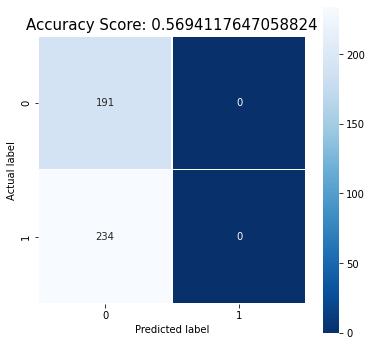

In [507]:
# create plot of confusion matrix using seaborn 

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title(all_sample_title, size = 15);

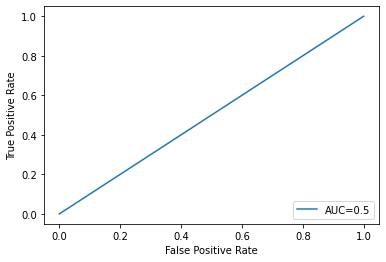

In [508]:
#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  prediction)
auc = metrics.roc_auc_score(Y_test, prediction)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Results

##COMBO RESULTS

In [509]:
test_Df_COMBO= pd.DataFrame(columns = ['Actual', 'Logistic Regression','Stepwise Logistic Regression 3','Stepwise Logistic Regression','XGBOOST','Random Forest','NN','KNN-5','Lasso','LDA','SVM Linear','SVM Poly','SVM RBF','Naive Bayes'])
test_Df_COMBO['Actual']=Y_test

#logistic regression
model = LogisticRegression()
model.fit(X_train_COMBO,Y_train)
y_pred_log_COMBO = model.predict_proba(X_test_COMBO)
prediction_log = [round(value) for value in y_pred_log_COMBO[:,1]]
score_log = metrics.accuracy_score(Y_test, prediction_log)
test_Df_COMBO['Logistic Regression']=prediction_log

#stepwise with 3 logistic
model = LogisticRegression()
model.fit(X_train_COMBO[used_step3_COMBO],Y_train)
y_pred_steplog3_COMBO = model.predict_proba(X_test_COMBO[used_step3_COMBO])
prediction_steplog3 = [round(value) for value in y_pred_steplog3_COMBO[:,1]]
score_steplog3 = metrics.accuracy_score(Y_test, prediction_steplog3)
test_Df_COMBO['Stepwise Logistic Regression 3']=prediction_steplog3

#stepwise from naiman already saved
#y_pred_steplog_COMBO
#prediction_steplog_COMBO
#score_steplog_COMBO
test_Df_COMBO['Stepwise Logistic Regression']=prediction_steplog_COMBO

#XGBOOST
model = XGBClassifier()
model.fit(X_train_COMBO, Y_train)
y_pred_XG_COMBO = model.predict_proba(X_test_COMBO)
prediction_XG = [round(value) for value in y_pred_XG_COMBO[:,1]]
score_XG = metrics.accuracy_score(Y_test, prediction_XG)
test_Df_COMBO['XGBOOST']=prediction_XG

#Random Forest
regressor = RandomForestClassifier(random_state = 0)
regressor.fit(X_train_COMBO, Y_train) 
y_pred_forest_COMBO= regressor.predict_proba(X_test_COMBO)
prediction_forest = [round(value) for value in y_pred_forest_COMBO[:,1]]
score_forest = metrics.accuracy_score(Y_test, prediction_forest)
test_Df_COMBO['Random Forest']=prediction_forest

#NN
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2) #p=2 means euclidean distance
classifier.fit(X_train_COMBO_scaled, Y_train)
y_pred_NN_COMBO = classifier.predict_proba(X_test_COMBO_scaled)
prediction_NN = [round(value) for value in y_pred_NN_COMBO[:,1]]
count= 0
for i, j in zip(prediction_NN,Y_test):
  if i==j:
    count+=1
score_NN=(count/len(Y_test))
test_Df_COMBO['NN']=prediction_NN

#KNN-K=5
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #p=2 means euclidean distance
classifier.fit(X_train_COMBO_scaled, Y_train)
y_pred_KNN_COMBO = classifier.predict_proba(X_test_COMBO_scaled)
prediction_KNN = [round(value) for value in y_pred_KNN_COMBO[:,1]]
count= 0
for i, j in zip(prediction_KNN,Y_test):
  if i==j:
    count+=1
score_KNN=(count/len(Y_test))
test_Df_COMBO['KNN-5']=prediction_KNN


#LASSO
reg = Lasso(alpha=model_lasso_COMBO.alpha_)
reg.fit(X_train_COMBO_scaled, Y_train)
y_pred_lasso_COMBO=reg.predict(X_test_COMBO_scaled)
prediction_lasso=y_pred_lasso_COMBO.copy()
for i in range(len(prediction_lasso)):
  if prediction_lasso[i] >= 0.10:
    prediction_lasso[i]=0
  elif prediction_lasso[i] < 0.10:
    prediction_lasso[i]=1
count= 0
for i, j in zip(prediction_lasso,Y_test):
  if i==j:
    count+=1
score_lasso=(count/len(Y_test))
test_Df_COMBO['Lasso']=prediction_lasso


#LDA
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_COMBO, Y_train)
LinearDiscriminantAnalysis()
y_pred_LDA_COMBO=clf.predict_proba(X_test_COMBO)
prediction_LDA = [round(value) for value in y_pred_LDA_COMBO[:,1]]
count= 0
for i, j in zip(prediction_LDA,Y_test):
  if i==j:
    count+=1
score_LDA=(count/len(Y_test))
test_Df_COMBO['LDA']=prediction_LDA


#SVM-Linear
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_COMBO, Y_train)
y_pred_SVML_COMBO = svclassifier.predict(X_test_COMBO)
prediction_SVML=y_pred_SVML_COMBO.copy()
for i in range(len(prediction_SVML)):
  if prediction_SVML[i] >= 0.10:
    prediction_SVML[i]=0
  elif prediction_SVML[i] < 0.10:
    prediction_SVML[i]=1
count= 0
for i, j in zip(prediction_SVML,Y_test):
  if i==j:
    count+=1
score_SVML=(count/len(prediction_SVML))
test_Df_COMBO['SVM Linear']=prediction_SVML


#SVM-Poly
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train_COMBO, Y_train)
y_pred_SVMP_COMBO = svclassifier.predict(X_test_COMBO)
prediction_SVMP=y_pred_SVMP_COMBO.copy()
for i in range(len(prediction_SVMP)):
  if prediction_SVMP[i] >= 0.10:
    prediction_SVMP[i]=0
  elif prediction_SVMP[i] < 0.10:
    prediction_SVMP[i]=1
count= 0
for i, j in zip(prediction_SVMP,Y_test):
  if i==j:
    count+=1
score_SVMP=(count/len(prediction_SVMP))
test_Df_COMBO['SVM Poly']=prediction_SVMP


#SVM-RBF
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train_COMBO, Y_train)
y_pred_SVMR_COMBO = svclassifier.predict(X_test_COMBO)
prediction_SVMR=y_pred_SVMR_COMBO.copy()
for i in range(len(prediction_SVMR)):
  if prediction_SVMR[i] >= 0.10:
    prediction_SVMR[i]=0
  elif prediction_SVMR[i] < 0.10:
    prediction_SVMR[i]=1
count= 0
for i, j in zip(prediction_SVMR,Y_test):
  if i==j:
    count+=1
score_SVMR=(count/len(prediction_SVMR))
test_Df_COMBO['SVM RBF']=prediction_SVMR

#Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train_COMBO_scaled, Y_train)
y_pred_NB_COMBO = classifier.predict_proba(X_test_COMBO_scaled)
prediction_NB = [round(value) for value in y_pred_NB_COMBO[:,1]]
score_NB =metrics.accuracy_score(Y_test, prediction_NB)
test_Df_COMBO['Naive Bayes']=prediction_NB


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [510]:
scores={}
L1=['Logistic Regression','Stepwise Logistic Regression 3','Stepwise Logistic Regression','XGBOOST','Random Forest','NN','KNN-5','Lasso','LDA','SVM Linear','SVM Poly','SVM RBF','Naive Bayes']
L2=[score_log,score_steplog3,score_steplog_COMBO,score_XG,score_forest,score_NN,score_KNN,score_lasso,score_LDA,score_SVML,score_SVMP,score_SVMR,score_NB]
for i,j in zip(L1,L2):
  scores[i]=float(j*100)
sorted(scores.items(), key=lambda x: x[1])

[('SVM Linear', 38.35294117647059),
 ('SVM Poly', 38.35294117647059),
 ('SVM RBF', 39.294117647058826),
 ('Lasso', 44.94117647058823),
 ('NN', 53.64705882352941),
 ('KNN-5', 55.529411764705884),
 ('Naive Bayes', 59.05882352941176),
 ('XGBOOST', 59.529411764705884),
 ('Stepwise Logistic Regression 3', 59.76470588235294),
 ('Random Forest', 61.64705882352941),
 ('Stepwise Logistic Regression', 61.882352941176464),
 ('Logistic Regression', 62.588235294117645),
 ('LDA', 63.294117647058826)]

##PFAS RESULTS

In [552]:
test_Df_PFAS= pd.DataFrame(columns = ['Actual', 'Logistic Regression','Stepwise Logistic Regression 3','Stepwise Logistic Regression','XGBOOST','Random Forest','NN','KNN-5','Lasso','LDA','SVM Linear','SVM Poly','SVM RBF','Naive Bayes'])
test_Df_PFAS['Actual']=Y_test

#logistic regression
model = LogisticRegression()
model.fit(X_train_PFAS,Y_train)
y_pred_log_PFAS = model.predict_proba(X_test_PFAS)
prediction_log = [round(value) for value in y_pred_log_PFAS[:,1]]
score_log = metrics.accuracy_score(Y_test, prediction_log)
test_Df_PFAS['Logistic Regression']=prediction_log

#stepwise with 3 logistic
model = LogisticRegression()
model.fit(X_train_PFAS[used_step3_PFAS],Y_train)
y_pred_steplog3_PFAS = model.predict_proba(X_test_PFAS[used_step3_PFAS])
prediction_steplog3 = [round(value) for value in y_pred_steplog3_PFAS[:,1]]
score_steplog3 = metrics.accuracy_score(Y_test, prediction_steplog3)
test_Df_PFAS['Stepwise Logistic Regression 3']=prediction_steplog3

#stepwise from naiman already saved
#y_pred_steplog_PFAS
#prediction_steplog_PFAS
#score_steplog_PFAS
test_Df_PFAS['Stepwise Logistic Regression']=prediction_steplog_PFAS

#XGBOOST
model = XGBClassifier()
model.fit(X_train_PFAS, Y_train)
y_pred_XG_PFAS = model.predict_proba(X_test_PFAS)
prediction_XG_PFAS = [round(value) for value in y_pred_XG_PFAS[:,1]]
score_XG = metrics.accuracy_score(Y_test, prediction_XG)
test_Df_PFAS['XGBOOST']=prediction_XG

#Random Forest
regressor = RandomForestClassifier(random_state = 0)
regressor.fit(X_train_PFAS, Y_train) 
y_pred_forest_PFAS= regressor.predict_proba(X_test_PFAS)
prediction_forest = [round(value) for value in y_pred_forest_PFAS[:,1]]
score_forest = metrics.accuracy_score(Y_test, prediction_forest)
test_Df_PFAS['Random Forest']=prediction_forest

#NN
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2) #p=2 means euclidean distance
classifier.fit(X_train_PFAS_scaled, Y_train)
y_pred_NN_PFAS = classifier.predict_proba(X_test_PFAS_scaled)
prediction_NN = [round(value) for value in y_pred_NN_PFAS[:,1]]
count= 0
for i, j in zip(prediction_NN,Y_test):
  if i==j:
    count+=1
score_NN=(count/len(Y_test))
test_Df_PFAS['NN']=prediction_NN

#KNN-K=5
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #p=2 means euclidean distance
classifier.fit(X_train_PFAS_scaled, Y_train)
y_pred_KNN_PFAS = classifier.predict_proba(X_test_PFAS_scaled)
prediction_KNN = [round(value) for value in y_pred_KNN_PFAS[:,1]]
count= 0
for i, j in zip(prediction_KNN,Y_test):
  if i==j:
    count+=1
score_KNN=(count/len(Y_test))
test_Df_PFAS['KNN-5']=prediction_KNN


#LASSO
reg = Lasso(alpha=model_lasso_PFAS.alpha_)
reg.fit(X_train_PFAS_scaled, Y_train)
y_pred_lasso_PFAS=reg.predict(X_test_PFAS_scaled)
prediction_lasso=y_pred_lasso_PFAS.copy()
for i in range(len(prediction_lasso)):
  if prediction_lasso[i] >= 0.10:
    prediction_lasso[i]=0
  elif prediction_lasso[i] < 0.10:
    prediction_lasso[i]=1
count= 0
for i, j in zip(prediction_lasso,Y_test):
  if i==j:
    count+=1
score_lasso=(count/len(Y_test))
test_Df_PFAS['Lasso']=prediction_lasso


#LDA
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_PFAS, Y_train)
LinearDiscriminantAnalysis()
y_pred_LDA_PFAS=clf.predict_proba(X_test_PFAS)
prediction_LDA = [round(value) for value in y_pred_LDA_PFAS[:,1]]
count= 0
for i, j in zip(prediction_LDA,Y_test):
  if i==j:
    count+=1
score_LDA=(count/len(Y_test))
test_Df_PFAS['LDA']=prediction_LDA


#SVM-Linear
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_PFAS, Y_train)
y_pred_SVML_PFAS = svclassifier.predict(X_test_PFAS)
prediction_SVML=y_pred_SVML_PFAS.copy()
for i in range(len(prediction_SVML)):
  if prediction_SVML[i] >= 0.10:
    prediction_SVML[i]=0
  elif prediction_SVML[i] < 0.10:
    prediction_SVML[i]=1
count= 0
for i, j in zip(prediction_SVML,Y_test):
  if i==j:
    count+=1
score_SVML=(count/len(prediction_SVML))
test_Df_PFAS['SVM Linear']=prediction_SVML


#SVM-Poly
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train_PFAS, Y_train)
y_pred_SVMP_PFAS = svclassifier.predict(X_test_PFAS)
prediction_SVMP=y_pred_SVMP_PFAS.copy()
for i in range(len(prediction_SVMP)):
  if prediction_SVMP[i] >= 0.10:
    prediction_SVMP[i]=0
  elif prediction_SVMP[i] < 0.10:
    prediction_SVMP[i]=1
count= 0
for i, j in zip(prediction_SVMP,Y_test):
  if i==j:
    count+=1
score_SVMP=(count/len(prediction_SVMP))
test_Df_PFAS['SVM Poly']=prediction_SVMP


#SVM-RBF
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train_PFAS, Y_train)
y_pred_SVMR_PFAS = svclassifier.predict(X_test_PFAS)
prediction_SVMR=y_pred_SVMR_PFAS.copy()
for i in range(len(prediction_SVMR)):
  if prediction_SVMR[i] >= 0.10:
    prediction_SVMR[i]=0
  elif prediction_SVMR[i] < 0.10:
    prediction_SVMR[i]=1
count= 0
for i, j in zip(prediction_SVMR,Y_test):
  if i==j:
    count+=1
score_SVMR=(count/len(prediction_SVMR))
test_Df_PFAS['SVM RBF']=prediction_SVMR

#Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train_PFAS_scaled, Y_train)
y_pred_NB_PFAS = classifier.predict_proba(X_test_PFAS_scaled)
prediction_NB = [round(value) for value in y_pred_NB_PFAS[:,1]]
score_NB =metrics.accuracy_score(Y_test, prediction_NB)
test_Df_PFAS['Naive Bayes']=prediction_NB


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [553]:
scores={}
L1=['Logistic Regression','Stepwise Logistic Regression 3','Stepwise Logistic Regression','XGBOOST','Random Forest','NN','KNN-5','Lasso','LDA','SVM Linear','SVM Poly','SVM RBF','Naive Bayes']
L2=[score_log,score_steplog3,score_steplog_PFAS,score_XG,score_forest,score_NN,score_KNN,score_lasso,score_LDA,score_SVML,score_SVMP,score_SVMR,score_NB]
for i,j in zip(L1,L2):
  scores[i]=float(j*100)
sorted(scores.items(), key=lambda x: x[1])

[('Naive Bayes', 44.70588235294118),
 ('Lasso', 47.294117647058826),
 ('SVM Linear', 47.294117647058826),
 ('SVM Poly', 47.294117647058826),
 ('SVM RBF', 47.294117647058826),
 ('XGBOOST', 49.1764705882353),
 ('Stepwise Logistic Regression 3', 52.94117647058824),
 ('KNN-5', 52.94117647058824),
 ('Logistic Regression', 53.17647058823529),
 ('Random Forest', 53.41176470588235),
 ('LDA', 53.64705882352941),
 ('NN', 55.05882352941176),
 ('Stepwise Logistic Regression', 60.705882352941174)]

##OUT RESULTS

In [554]:
test_Df_OUT= pd.DataFrame(columns = ['Actual', 'Logistic Regression','Stepwise Logistic Regression 3','Stepwise Logistic Regression','XGBOOST','Random Forest','NN','KNN-5','Lasso','LDA','SVM Linear','SVM Poly','SVM RBF','Naive Bayes'])
test_Df_OUT['Actual']=Y_test

#logistic regression
model = LogisticRegression()
model.fit(X_train_OUT,Y_train)
y_pred_log_OUT = model.predict_proba(X_test_OUT)
prediction_log = [round(value) for value in y_pred_log_OUT[:,1]]
score_log = metrics.accuracy_score(Y_test, prediction_log)
test_Df_OUT['Logistic Regression']=prediction_log

#stepwise with 3 logistic
model = LogisticRegression()
model.fit(X_train_OUT[used_step3_OUT],Y_train)
y_pred_steplog3_OUT = model.predict_proba(X_test_OUT[used_step3_OUT])
prediction_steplog3 = [round(value) for value in y_pred_steplog3_OUT[:,1]]
score_steplog3 = metrics.accuracy_score(Y_test, prediction_steplog3)
test_Df_OUT['Stepwise Logistic Regression 3']=prediction_steplog3

#stepwise from naiman already saved
#y_pred_steplog_OUT
#prediction_steplog_OUT
#score_steplog_OUT
test_Df_OUT['Stepwise Logistic Regression']=prediction_steplog_OUT

#XGBOOST
model = XGBClassifier()
model.fit(X_train_OUT, Y_train)
y_pred_XG_OUT = model.predict_proba(X_test_OUT)
prediction_XG = [round(value) for value in y_pred_XG_OUT[:,1]]
score_XG = metrics.accuracy_score(Y_test, prediction_XG)
test_Df_OUT['XGBOOST']=prediction_XG

#Random Forest
regressor = RandomForestClassifier(random_state = 0)
regressor.fit(X_train_OUT, Y_train) 
y_pred_forest_OUT= regressor.predict_proba(X_test_OUT)
prediction_forest = [round(value) for value in y_pred_forest_OUT[:,1]]
score_forest = metrics.accuracy_score(Y_test, prediction_forest)
test_Df_OUT['Random Forest']=prediction_forest

#NN
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2) #p=2 means euclidean distance
classifier.fit(X_train_OUT_scaled, Y_train)
y_pred_NN_OUT = classifier.predict_proba(X_test_OUT_scaled)
prediction_NN = [round(value) for value in y_pred_NN_OUT[:,1]]
count= 0
for i, j in zip(prediction_NN,Y_test):
  if i==j:
    count+=1
score_NN=(count/len(Y_test))
test_Df_OUT['NN']=prediction_NN

#KNN-K=5
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #p=2 means euclidean distance
classifier.fit(X_train_OUT_scaled, Y_train)
y_pred_KNN_OUT = classifier.predict_proba(X_test_OUT_scaled)
prediction_KNN = [round(value) for value in y_pred_KNN_OUT[:,1]]
count= 0
for i, j in zip(prediction_KNN,Y_test):
  if i==j:
    count+=1
score_KNN=(count/len(Y_test))
test_Df_OUT['KNN-5']=prediction_KNN


#LASSO
reg = Lasso(alpha=model_lasso_OUT.alpha_)
reg.fit(X_train_OUT_scaled, Y_train)
y_pred_lasso_OUT=reg.predict(X_test_OUT_scaled)
prediction_lasso=y_pred_lasso_OUT.copy()
for i in range(len(prediction_lasso)):
  if prediction_lasso[i] >= 0.10:
    prediction_lasso[i]=0
  elif prediction_lasso[i] < 0.10:
    prediction_lasso[i]=1
count= 0
for i, j in zip(prediction_lasso,Y_test):
  if i==j:
    count+=1
score_lasso=(count/len(Y_test))
test_Df_OUT['Lasso']=prediction_lasso


#LDA
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_OUT, Y_train)
LinearDiscriminantAnalysis()
y_pred_LDA_OUT=clf.predict_proba(X_test_OUT)
prediction_LDA = [round(value) for value in y_pred_LDA_OUT[:,1]]
count= 0
for i, j in zip(prediction_LDA,Y_test):
  if i==j:
    count+=1
score_LDA=(count/len(Y_test))
test_Df_OUT['LDA']=prediction_LDA


#SVM-Linear
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_OUT, Y_train)
y_pred_SVML_OUT = svclassifier.predict(X_test_OUT)
prediction_SVML=y_pred_SVML_OUT.copy()
for i in range(len(prediction_SVML)):
  if prediction_SVML[i] >= 0.10:
    prediction_SVML[i]=0
  elif prediction_SVML[i] < 0.10:
    prediction_SVML[i]=1
count= 0
for i, j in zip(prediction_SVML,Y_test):
  if i==j:
    count+=1
score_SVML=(count/len(prediction_SVML))
test_Df_OUT['SVM Linear']=prediction_SVML


#SVM-Poly
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train_OUT, Y_train)
y_pred_SVMP_OUT = svclassifier.predict(X_test_OUT)
prediction_SVMP=y_pred_SVMP_OUT.copy()
for i in range(len(prediction_SVMP)):
  if prediction_SVMP[i] >= 0.10:
    prediction_SVMP[i]=0
  elif prediction_SVMP[i] < 0.10:
    prediction_SVMP[i]=1
count= 0
for i, j in zip(prediction_SVMP,Y_test):
  if i==j:
    count+=1
score_SVMP=(count/len(prediction_SVMP))
test_Df_OUT['SVM Poly']=prediction_SVMP


#SVM-RBF
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train_OUT, Y_train)
y_pred_SVMR_OUT = svclassifier.predict(X_test_OUT)
prediction_SVMR=y_pred_SVMR_OUT.copy()
for i in range(len(prediction_SVMR)):
  if prediction_SVMR[i] >= 0.10:
    prediction_SVMR[i]=0
  elif prediction_SVMR[i] < 0.10:
    prediction_SVMR[i]=1
count= 0
for i, j in zip(prediction_SVMR,Y_test):
  if i==j:
    count+=1
score_SVMR=(count/len(prediction_SVMR))
test_Df_OUT['SVM RBF']=prediction_SVMR

#Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train_OUT_scaled, Y_train)
y_pred_NB_OUT = classifier.predict_proba(X_test_OUT_scaled)
prediction_NB = [round(value) for value in y_pred_NB_OUT[:,1]]
score_NB =metrics.accuracy_score(Y_test, prediction_NB)
test_Df_OUT['Naive Bayes']=prediction_NB

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [555]:
scores={}
L1=['Logistic Regression','Stepwise Logistic Regression 3','Stepwise Logistic Regression','XGBOOST','Random Forest','NN','KNN-5','Lasso','LDA','SVM Linear','SVM Poly','SVM RBF','Naive Bayes']
L2=[score_log,score_steplog3,score_steplog_OUT,score_XG,score_forest,score_NN,score_KNN,score_lasso,score_LDA,score_SVML,score_SVMP,score_SVMR,score_NB]
for i,j in zip(L1,L2):
  scores[i]=float(j*100)
sorted(scores.items(), key=lambda x: x[1])

[('SVM Poly', 47.05882352941176),
 ('SVM RBF', 47.05882352941176),
 ('Lasso', 47.294117647058826),
 ('SVM Linear', 47.529411764705884),
 ('Random Forest', 48.470588235294116),
 ('XGBOOST', 50.35294117647059),
 ('Logistic Regression', 50.588235294117645),
 ('Naive Bayes', 51.52941176470588),
 ('LDA', 51.76470588235295),
 ('Stepwise Logistic Regression 3', 52.23529411764706),
 ('KNN-5', 52.94117647058824),
 ('NN', 53.88235294117647),
 ('Stepwise Logistic Regression', 57.1764705882353)]

#Compare

In [556]:
display(test_Df_OUT)

,Actual,Logistic Regression,Stepwise Logistic Regression 3,Stepwise Logistic Regression,XGBOOST,Random Forest,NN,KNN-5,Lasso,LDA,SVM Linear,SVM Poly,SVM RBF,Naive Bayes
1237,0.0,1,1,1,1,0,0,1,0.0,1,0.0,0.0,0.0,1
651,1.0,1,1,1,0,1,0,1,0.0,1,0.0,0.0,0.0,1
709,1.0,1,1,1,0,0,0,1,0.0,1,0.0,0.0,0.0,0
281,1.0,1,1,1,0,0,0,0,0.0,1,0.0,0.0,0.0,1
793,1.0,1,1,1,1,0,0,1,0.0,1,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,1.0,1,1,1,1,1,0,1,0.0,1,0.0,0.0,0.0,0
874,0.0,1,1,1,1,1,1,1,0.0,1,0.0,0.0,0.0,1
656,0.0,1,1,0,1,1,1,0,0.0,1,0.0,0.0,0.0,0
1089,1.0,1,1,1,1,1,0,0,0.0,1,0.0,0.0,0.0,1


In [557]:
display(test_Df_PFAS)

,Actual,Logistic Regression,Stepwise Logistic Regression 3,Stepwise Logistic Regression,XGBOOST,Random Forest,NN,KNN-5,Lasso,LDA,SVM Linear,SVM Poly,SVM RBF,Naive Bayes
1237,0.0,1,1,1,0,0,0,1,0.0,1,0.0,0.0,0.0,0
651,1.0,1,1,1,1,1,1,1,0.0,1,0.0,0.0,0.0,0
709,1.0,1,1,1,1,0,0,0,0.0,1,0.0,0.0,0.0,0
281,1.0,1,1,1,0,0,0,0,0.0,1,0.0,0.0,0.0,0
793,1.0,1,1,1,1,1,1,1,0.0,1,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,1.0,1,1,1,1,0,0,1,0.0,1,0.0,0.0,0.0,0
874,0.0,1,1,1,1,1,1,1,0.0,1,0.0,0.0,0.0,0
656,0.0,1,1,1,1,1,1,1,0.0,1,0.0,0.0,0.0,0
1089,1.0,1,1,0,0,0,0,1,0.0,1,0.0,0.0,0.0,1


In [558]:
display(test_Df_COMBO)

,Actual,Logistic Regression,Stepwise Logistic Regression 3,Stepwise Logistic Regression,XGBOOST,Random Forest,NN,KNN-5,Lasso,LDA,SVM Linear,SVM Poly,SVM RBF,Naive Bayes
70,1.0,1,1,1,0,0,0,0,0.0,1,0.0,0.0,0.0,0
420,0.0,1,1,1,1,1,1,1,0.0,1,0.0,0.0,0.0,0
846,1.0,1,1,1,1,1,1,1,0.0,1,0.0,0.0,0.0,1
77,0.0,0,1,0,0,0,1,0,0.0,0,1.0,1.0,1.0,0
1517,0.0,1,1,1,1,1,0,1,0.0,1,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,0.0,1,1,1,1,1,1,1,0.0,1,0.0,0.0,0.0,1
211,1.0,1,1,1,1,1,0,1,0.0,1,0.0,0.0,0.0,1
1927,0.0,0,0,0,1,1,0,1,0.0,0,1.0,0.0,0.0,0
433,0.0,0,0,0,0,1,1,1,0.0,0,1.0,0.0,1.0,0


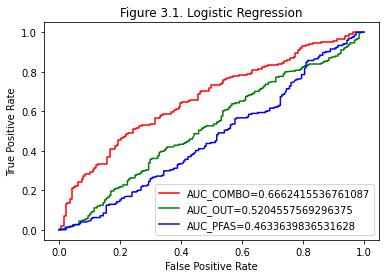

In [559]:
#ROC curves on same plot
fpr, tpr, threshold = metrics.roc_curve(test_Df_COMBO["Actual"],  y_pred_log_COMBO[:,1])
auc = metrics.roc_auc_score(test_Df_COMBO["Actual"], y_pred_log_COMBO[:,1])
plt.plot(fpr,tpr,label="AUC_COMBO="+str(auc),color='r')

fpr, tpr, threshold = metrics.roc_curve(test_Df_OUT["Actual"],  y_pred_log_OUT[:,1])
auc = metrics.roc_auc_score(test_Df_OUT["Actual"], y_pred_log_OUT[:,1])
plt.plot(fpr,tpr,label="AUC_OUT="+str(auc),color='g')

fpr, tpr, threshold = metrics.roc_curve(test_Df_PFAS["Actual"],  y_pred_log_PFAS[:,1])
auc = metrics.roc_auc_score(test_Df_PFAS["Actual"], y_pred_log_PFAS[:,1])
plt.plot(fpr,tpr,label="AUC_PFAS="+str(auc),color='b')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Figure 3.1. Logistic Regression")
plt.legend(loc=4)
plt.savefig("Figure 3.1_Chem3.png",figsize=(8, 6), dpi=80,format='png')
plt.show()

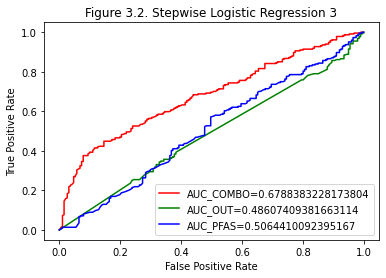

In [560]:
#ROC curves on same plot
fpr, tpr, threshold = metrics.roc_curve(test_Df_COMBO["Actual"],  y_pred_steplog3_COMBO[:,1])
auc = metrics.roc_auc_score(test_Df_COMBO["Actual"], y_pred_steplog3_COMBO[:,1])
plt.plot(fpr,tpr,label="AUC_COMBO="+str(auc),color='r')

fpr, tpr, threshold = metrics.roc_curve(test_Df_OUT["Actual"],  y_pred_steplog3_OUT[:,1])
auc = metrics.roc_auc_score(test_Df_OUT["Actual"], y_pred_steplog3_OUT[:,1])
plt.plot(fpr,tpr,label="AUC_OUT="+str(auc),color='g')

fpr, tpr, threshold = metrics.roc_curve(test_Df_PFAS["Actual"],  y_pred_steplog3_PFAS[:,1])
auc = metrics.roc_auc_score(test_Df_PFAS["Actual"], y_pred_steplog3_PFAS[:,1])
plt.plot(fpr,tpr,label="AUC_PFAS="+str(auc),color='b')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Figure 3.2. Stepwise Logistic Regression 3")
plt.legend(loc=4)
plt.savefig("Figure 3.2_Chem3.png",figsize=(8, 6), dpi=80,format='png')
plt.show()

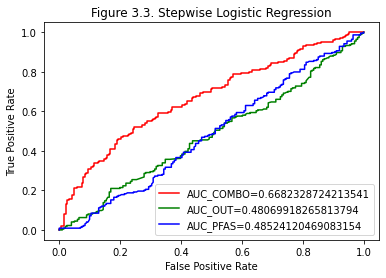

In [561]:
#ROC curves on same plot
fpr, tpr, threshold = metrics.roc_curve(test_Df_COMBO["Actual"],  y_pred_steplog_COMBO[:,1])
auc = metrics.roc_auc_score(test_Df_COMBO["Actual"], y_pred_steplog_COMBO[:,1])
plt.plot(fpr,tpr,label="AUC_COMBO="+str(auc),color='r')

fpr, tpr, threshold = metrics.roc_curve(test_Df_OUT["Actual"],  y_pred_steplog_OUT[:,1])
auc = metrics.roc_auc_score(test_Df_OUT["Actual"], y_pred_steplog_OUT[:,1])
plt.plot(fpr,tpr,label="AUC_OUT="+str(auc),color='g')

fpr, tpr, threshold = metrics.roc_curve(test_Df_PFAS["Actual"],  y_pred_steplog_PFAS[:,1])
auc = metrics.roc_auc_score(test_Df_PFAS["Actual"], y_pred_steplog_PFAS[:,1])
plt.plot(fpr,tpr,label="AUC_PFAS="+str(auc),color='b')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Figure 3.3. Stepwise Logistic Regression")
plt.legend(loc=4)
plt.savefig("Figure 3.3_Chem3.png",figsize=(8, 6), dpi=80,format='png')
plt.show()

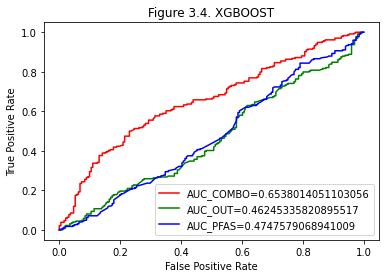

In [562]:
#ROC curves on same plot
fpr, tpr, threshold = metrics.roc_curve(test_Df_COMBO["Actual"], y_pred_XG_COMBO[:,1])
auc = metrics.roc_auc_score(test_Df_COMBO["Actual"], y_pred_XG_COMBO[:,1])
plt.plot(fpr,tpr,label="AUC_COMBO="+str(auc),color='r')

fpr, tpr, threshold = metrics.roc_curve(test_Df_OUT["Actual"],  y_pred_XG_OUT[:,1])
auc = metrics.roc_auc_score(test_Df_OUT["Actual"], y_pred_XG_OUT[:,1])
plt.plot(fpr,tpr,label="AUC_OUT="+str(auc),color='g')

fpr, tpr, threshold = metrics.roc_curve(test_Df_PFAS["Actual"],  y_pred_XG_PFAS[:,1])
auc = metrics.roc_auc_score(test_Df_PFAS["Actual"], y_pred_XG_PFAS[:,1])
plt.plot(fpr,tpr,label="AUC_PFAS="+str(auc),color='b')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Figure 3.4. XGBOOST")
plt.legend(loc=4)
plt.savefig("Figure 3.4_Chem3.png",figsize=(8, 6), dpi=80,format='png')
plt.show()

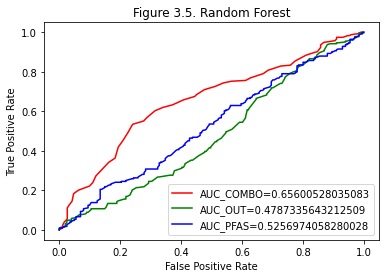

In [563]:
#ROC curves on same plot
fpr, tpr, threshold = metrics.roc_curve(test_Df_COMBO["Actual"],  y_pred_forest_COMBO[:,1])
auc = metrics.roc_auc_score(test_Df_COMBO["Actual"], y_pred_forest_COMBO[:,1])
plt.plot(fpr,tpr,label="AUC_COMBO="+str(auc),color='r')

fpr, tpr, threshold = metrics.roc_curve(test_Df_OUT["Actual"],  y_pred_forest_OUT[:,1])
auc = metrics.roc_auc_score(test_Df_OUT["Actual"], y_pred_forest_OUT[:,1])
plt.plot(fpr,tpr,label="AUC_OUT="+str(auc),color='g')

fpr, tpr, threshold = metrics.roc_curve(test_Df_PFAS["Actual"],  y_pred_forest_PFAS[:,1])
auc = metrics.roc_auc_score(test_Df_PFAS["Actual"], y_pred_forest_PFAS[:,1])
plt.plot(fpr,tpr,label="AUC_PFAS="+str(auc),color='b')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Figure 3.5. Random Forest")
plt.legend(loc=4)
plt.savefig("Figure 3.5_Chem3.png",figsize=(8, 6), dpi=80,format='png')
plt.show()

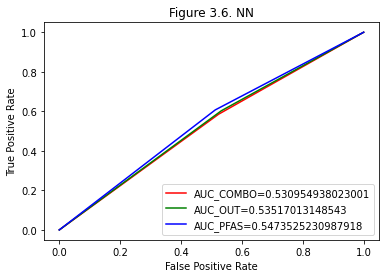

In [564]:
#ROC curves on same plot
fpr, tpr, threshold = metrics.roc_curve(test_Df_COMBO["Actual"],  y_pred_NN_COMBO[:,1])
auc = metrics.roc_auc_score(test_Df_COMBO["Actual"], y_pred_NN_COMBO[:,1])
plt.plot(fpr,tpr,label="AUC_COMBO="+str(auc),color='r')

fpr, tpr, threshold = metrics.roc_curve(test_Df_OUT["Actual"],  y_pred_NN_OUT[:,1])
auc = metrics.roc_auc_score(test_Df_OUT["Actual"], y_pred_NN_OUT[:,1])
plt.plot(fpr,tpr,label="AUC_OUT="+str(auc),color='g')

fpr, tpr, threshold = metrics.roc_curve(test_Df_PFAS["Actual"],  y_pred_NN_PFAS[:,1])
auc = metrics.roc_auc_score(test_Df_PFAS["Actual"], y_pred_NN_PFAS[:,1])
plt.plot(fpr,tpr,label="AUC_PFAS="+str(auc),color='b')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Figure 3.6. NN")
plt.legend(loc=4)
plt.savefig("Figure 3.6_Chem3.png",figsize=(8, 6), dpi=80,format='png')
plt.show()

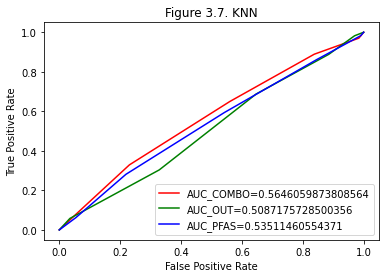

In [565]:
#ROC curves on same plot
fpr, tpr, threshold = metrics.roc_curve(test_Df_COMBO["Actual"],  y_pred_KNN_COMBO[:,1])
auc = metrics.roc_auc_score(test_Df_COMBO["Actual"], y_pred_KNN_COMBO[:,1])
plt.plot(fpr,tpr,label="AUC_COMBO="+str(auc),color='r')

fpr, tpr, threshold = metrics.roc_curve(test_Df_OUT["Actual"],  y_pred_KNN_OUT[:,1])
auc = metrics.roc_auc_score(test_Df_OUT["Actual"], y_pred_KNN_OUT[:,1])
plt.plot(fpr,tpr,label="AUC_OUT="+str(auc),color='g')

fpr, tpr, threshold = metrics.roc_curve(test_Df_PFAS["Actual"],  y_pred_KNN_PFAS[:,1])
auc = metrics.roc_auc_score(test_Df_PFAS["Actual"], y_pred_KNN_PFAS[:,1])
plt.plot(fpr,tpr,label="AUC_PFAS="+str(auc),color='b')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Figure 3.7. KNN")
plt.legend(loc=4)
plt.savefig("Figure 3.7_Chem3.png",figsize=(8, 6), dpi=80,format='png')
plt.show()

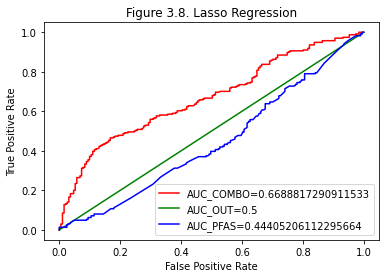

In [566]:
#ROC curves on same plot
fpr, tpr, threshold = metrics.roc_curve(test_Df_COMBO["Actual"],  y_pred_lasso_COMBO)
auc = metrics.roc_auc_score(test_Df_COMBO["Actual"], y_pred_lasso_COMBO)
plt.plot(fpr,tpr,label="AUC_COMBO="+str(auc),color='r')

fpr, tpr, threshold = metrics.roc_curve(test_Df_OUT["Actual"],  y_pred_lasso_OUT)
auc = metrics.roc_auc_score(test_Df_OUT["Actual"], y_pred_lasso_OUT)
plt.plot(fpr,tpr,label="AUC_OUT="+str(auc),color='g')

fpr, tpr, threshold = metrics.roc_curve(test_Df_PFAS["Actual"],  y_pred_lasso_PFAS)
auc = metrics.roc_auc_score(test_Df_PFAS["Actual"], y_pred_lasso_PFAS)
plt.plot(fpr,tpr,label="AUC_PFAS="+str(auc),color='b')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Figure 3.8. Lasso Regression")
plt.legend(loc=4)
plt.savefig("Figure 3.8_Chem3.png",figsize=(8, 6), dpi=80,format='png')
plt.show()

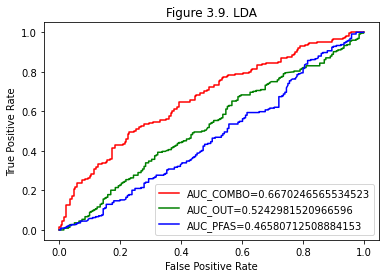

In [567]:
#ROC curves on same plot
fpr, tpr, threshold = metrics.roc_curve(test_Df_COMBO["Actual"],  y_pred_LDA_COMBO[:,1])
auc = metrics.roc_auc_score(test_Df_COMBO["Actual"], y_pred_LDA_COMBO[:,1])
plt.plot(fpr,tpr,label="AUC_COMBO="+str(auc),color='r')

fpr, tpr, threshold = metrics.roc_curve(test_Df_OUT["Actual"],  y_pred_LDA_OUT[:,1])
auc = metrics.roc_auc_score(test_Df_OUT["Actual"], y_pred_LDA_OUT[:,1])
plt.plot(fpr,tpr,label="AUC_OUT="+str(auc),color='g')

fpr, tpr, threshold = metrics.roc_curve(test_Df_PFAS["Actual"],  y_pred_LDA_PFAS[:,1])
auc = metrics.roc_auc_score(test_Df_PFAS["Actual"], y_pred_LDA_PFAS[:,1])
plt.plot(fpr,tpr,label="AUC_PFAS="+str(auc),color='b')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Figure 3.9. LDA")
plt.legend(loc=4)
plt.savefig("Figure 3.9_Chem3.png",figsize=(8, 6), dpi=80,format='png')
plt.show()

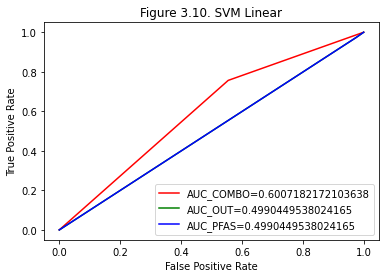

In [568]:
#ROC curves on same plot
fpr, tpr, threshold = metrics.roc_curve(test_Df_COMBO["Actual"],  y_pred_SVML_COMBO)
auc = metrics.roc_auc_score(test_Df_COMBO["Actual"], y_pred_SVML_COMBO)
plt.plot(fpr,tpr,label="AUC_COMBO="+str(auc),color='r')

fpr, tpr, threshold = metrics.roc_curve(test_Df_OUT["Actual"],  y_pred_SVML_OUT)
auc = metrics.roc_auc_score(test_Df_OUT["Actual"], y_pred_SVML_OUT)
plt.plot(fpr,tpr,label="AUC_OUT="+str(auc),color='g')

fpr, tpr, threshold = metrics.roc_curve(test_Df_PFAS["Actual"],  y_pred_SVML_OUT)
auc = metrics.roc_auc_score(test_Df_PFAS["Actual"], y_pred_SVML_OUT)
plt.plot(fpr,tpr,label="AUC_PFAS="+str(auc),color='b')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Figure 3.10. SVM Linear")
plt.legend(loc=4)
plt.savefig("Figure 3.10_Chem3.png",figsize=(8, 6), dpi=80,format='png')
plt.show()

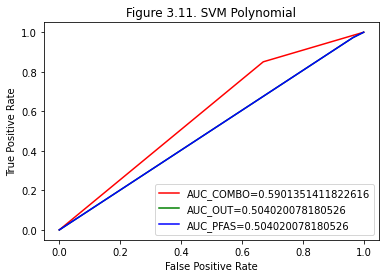

In [569]:
#ROC curves on same plot
fpr, tpr, threshold = metrics.roc_curve(test_Df_COMBO["Actual"],  y_pred_SVMP_COMBO)
auc = metrics.roc_auc_score(test_Df_COMBO["Actual"], y_pred_SVMP_COMBO)
plt.plot(fpr,tpr,label="AUC_COMBO="+str(auc),color='r')

fpr, tpr, threshold = metrics.roc_curve(test_Df_OUT["Actual"],  y_pred_SVMP_OUT)
auc = metrics.roc_auc_score(test_Df_OUT["Actual"], y_pred_SVMP_OUT)
plt.plot(fpr,tpr,label="AUC_OUT="+str(auc),color='g')

fpr, tpr, threshold = metrics.roc_curve(test_Df_PFAS["Actual"],  y_pred_SVMP_OUT)
auc = metrics.roc_auc_score(test_Df_PFAS["Actual"], y_pred_SVMP_OUT)
plt.plot(fpr,tpr,label="AUC_PFAS="+str(auc),color='b')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Figure 3.11. SVM Polynomial")
plt.legend(loc=4)
plt.savefig("Figure 3.11_Chem3.png",figsize=(8, 6), dpi=80,format='png')
plt.show()

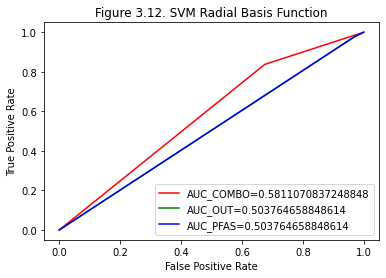

In [570]:
#ROC curves on same plot
fpr, tpr, threshold = metrics.roc_curve(test_Df_COMBO["Actual"],  y_pred_SVMR_COMBO)
auc = metrics.roc_auc_score(test_Df_COMBO["Actual"], y_pred_SVMR_COMBO)
plt.plot(fpr,tpr,label="AUC_COMBO="+str(auc),color='r')

fpr, tpr, threshold = metrics.roc_curve(test_Df_OUT["Actual"],  y_pred_SVMR_OUT)
auc = metrics.roc_auc_score(test_Df_OUT["Actual"], y_pred_SVMR_OUT)
plt.plot(fpr,tpr,label="AUC_OUT="+str(auc),color='g')

fpr, tpr, threshold = metrics.roc_curve(test_Df_PFAS["Actual"],  y_pred_SVMR_OUT)
auc = metrics.roc_auc_score(test_Df_PFAS["Actual"], y_pred_SVMR_OUT)
plt.plot(fpr,tpr,label="AUC_PFAS="+str(auc),color='b')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Figure 3.12. SVM Radial Basis Function")
plt.legend(loc=4)
plt.savefig("Figure 3.12_Chem3.png",figsize=(8, 6), dpi=80,format='png')
plt.show()

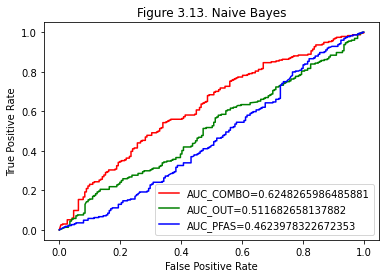

In [571]:
#ROC curves on same plot
fpr, tpr, threshold = metrics.roc_curve(test_Df_COMBO["Actual"],  y_pred_NB_COMBO[:,1])
auc = metrics.roc_auc_score(test_Df_COMBO["Actual"], y_pred_NB_COMBO[:,1])
plt.plot(fpr,tpr,label="AUC_COMBO="+str(auc),color='r')

fpr, tpr, threshold = metrics.roc_curve(test_Df_OUT["Actual"],  y_pred_NB_OUT[:,1])
auc = metrics.roc_auc_score(test_Df_OUT["Actual"], y_pred_NB_OUT[:,1])
plt.plot(fpr,tpr,label="AUC_OUT="+str(auc),color='g')

fpr, tpr, threshold = metrics.roc_curve(test_Df_PFAS["Actual"],  y_pred_NB_PFAS[:,1])
auc = metrics.roc_auc_score(test_Df_PFAS["Actual"], y_pred_NB_PFAS[:,1])
plt.plot(fpr,tpr,label="AUC_PFAS="+str(auc),color='b')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Figure 3.13. Naive Bayes")
plt.legend(loc=4)
plt.savefig("Figure 3.13_Chem3.png",figsize=(8, 6), dpi=80,format='png')
plt.show()